In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#import library here
import pandas as pd
import numpy as np
import re  ## https://regex101.com/
import string
from collections import Counter

#import nltk and download nltk_data
import nltk
from nltk.util import bigrams
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from textblob import TextBlob
from nltk import pos_tag, RegexpParser
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('tagsets')
# nltk.download('averaged_perceptron_tagger')
# nltk.help.upenn_tagset('WDT')


# Preprocessing Video Dataset

In [ ]:
video_data = "/content/drive/MyDrive/Datathon/videos.csv"
df = pd.read_csv(video_data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92759 entries, 0 to 92758
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   kind                  92759 non-null  object 
 1   videoId               92759 non-null  int64  
 2   publishedAt           92759 non-null  object 
 3   channelId             92759 non-null  int64  
 4   title                 92759 non-null  object 
 5   description           35237 non-null  object 
 6   tags                  20891 non-null  object 
 7   defaultLanguage       15785 non-null  object 
 8   defaultAudioLanguage  29956 non-null  object 
 9   contentDuration       91492 non-null  object 
 10  viewCount             91490 non-null  float64
 11  likeCount             86630 non-null  float64
 12  favouriteCount        91492 non-null  float64
 13  commentCount          90294 non-null  float64
 14  topicCategories       91228 non-null  object 
dtypes: float64(4), int6

In [ ]:
print(df.loc[[199]])

              kind  videoId                publishedAt  channelId  \
199  youtube#video    35154  2023-03-06 10:58:28+00:00      10881   

                                                 title description tags  \
199  No Gatekeeping🚫 The gel is @cbsbeautyuk🤌🏾  htt...         NaN  NaN   

    defaultLanguage defaultAudioLanguage contentDuration  viewCount  \
199             NaN                  NaN            PT9S     1457.0   

     likeCount  favouriteCount  commentCount  \
199       27.0             0.0           1.0   

                                       topicCategories  
199  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...  


In [ ]:
df.columns

Index(['kind', 'videoId', 'publishedAt', 'channelId', 'title', 'description',
       'tags', 'defaultLanguage', 'defaultAudioLanguage', 'contentDuration',
       'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
       'topicCategories'],
      dtype='object')

In [ ]:
import pandas as pd

df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
#Minimize Dataset
df = df[['videoId', 'publishedAt', 'channelId', 'title', 'description',
       'tags', 'topicCategories']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92759 entries, 0 to 92758
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   videoId          92759 non-null  int64              
 1   publishedAt      92759 non-null  datetime64[ns, UTC]
 2   channelId        92759 non-null  int64              
 3   title            92759 non-null  object             
 4   description      35237 non-null  object             
 5   tags             20891 non-null  object             
 6   topicCategories  91228 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 5.0+ MB


# Check Null Value


In [ ]:
null_counts_per_column = df.isnull().sum()
null_counts_per_column

,0
videoId,0
publishedAt,0
channelId,0
title,0
description,57522
tags,71868
topicCategories,1531


In [ ]:
df.head(50)

,videoId,publishedAt,channelId,title,description,tags,topicCategories
0,85806,2024-01-15 00:59:29+00:00,33807,Unlocking the Benefits of Face Masks for Skin ...,NaN,NaN,"['https://en.wikipedia.org/wiki/Health', 'http..."
1,30556,2023-10-27 19:32:16+00:00,46650,Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
2,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
3,45298,2023-07-13 15:19:28+00:00,50139,#shortvedio #balayage,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
4,43611,2023-04-29 18:47:37+00:00,8143,Full Face of Merit Beauty 🤎 featuring new Flus...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
5,32398,2021-10-06 01:28:59+00:00,39642,body lotion fit tuber 👈|| girls body lotion 👆|...,NaN,"['body lotion fit tuber', 'fit tuber body loti...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...
6,90721,2021-02-02 13:04:11+00:00,25860,"Contour Tutorial / How to do Contouring, Blush...",Makeup and Hair by @jagrutililawala\n\n#bride ...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
7,77725,2022-11-14 20:58:31+00:00,27788,Best look comes from the best products! #best ...,www.sopoli10x.com \n\n Beauty &Fashion. We re...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
8,81779,2025-05-08 10:52:09+00:00,7310,Finishing touches. #blackgirlmakeup#makeup#bla...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
9,43693,2025-06-19 01:45:26+00:00,47519,glowup tips ✨️ #jenny #kpop #skincare #skincar...,#JennyGlowUp\n#KpopGlowUp\n#BeforeVsAfter\n#Gl...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...


## Data Cleaning for Video Dataset

In [ ]:
df['Length'] = df['title'].apply(len)
df.head()

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
0,85806,2024-01-15 00:59:29+00:00,33807,Unlocking the Benefits of Face Masks for Skin ...,NaN,NaN,"['https://en.wikipedia.org/wiki/Health', 'http...",52
1,30556,2023-10-27 19:32:16+00:00,46650,Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,76
2,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,63
3,45298,2023-07-13 15:19:28+00:00,50139,#shortvedio #balayage,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,21
4,43611,2023-04-29 18:47:37+00:00,8143,Full Face of Merit Beauty 🤎 featuring new Flus...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,92


'l&#39;m in love wd Aqualogica&#39;s Body &amp;Hair mists 4m @aqualogica.in..Use code &quot;AQUAIG20&quot; for 20% discount'

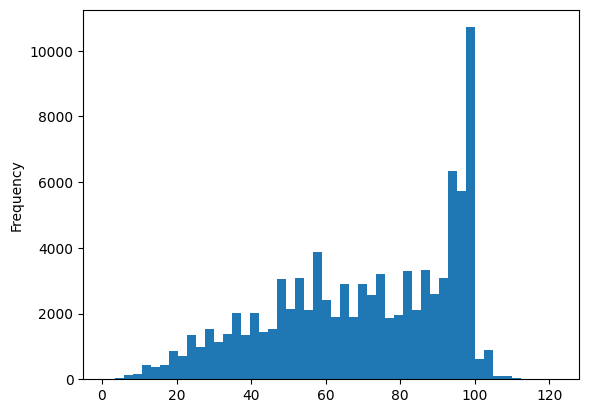

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df['Length'].plot(bins=50, kind='hist')
df['Length'].describe()
df[df['Length'] == 122]['title'].iloc[0]

In [ ]:
# Check for duplicate value
duplicates = df[df.duplicated('title')]
duplicates.sort_values('title')

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
60833,36655,2025-03-08 07:00:14+00:00,43873,#CapCut One-time hair dye #boyhair #hairstyles...,NaN,NaN,"['https://en.wikipedia.org/wiki/Hobby', 'https...",73
60463,2666,2025-02-12 07:00:01+00:00,354,#CapCut One-time hair dye #boyhair #hairstyles...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,73
56502,39479,2025-02-10 07:00:14+00:00,354,#CapCut One-time hair dye #boyhair #hairstyles...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,73
88650,60678,2025-02-11 07:00:20+00:00,354,#CapCut One-time hair dye #boyhair #hairstyles...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,73
75694,12100,2023-06-19 11:17:16+00:00,42016,#Cool summer look#Highlights @ Hair Cut #lore...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,97
...,...,...,...,...,...,...,...,...
64820,37084,2021-08-26 17:16:00+00:00,41502,🧖Mask beauty &amp; beauty makeup👄💄//Skincare r...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,53
65847,27839,2021-08-26 17:15:44+00:00,41502,🧖Mask beauty &amp; beauty makeup👄💄//Skincare r...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,53
21528,8838,2021-08-26 17:15:25+00:00,41502,🧖Mask beauty &amp; beauty makeup👄💄//Skincare r...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,53
24149,48009,2021-08-25 15:07:19+00:00,41502,🧖Mask beauty &amp; beauty makeup👄💄//Skincare r...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,53


## Chatword

In [ ]:
import re

chat_words = {

    "AFAIK": "As Far As I Know",

    "AFK": "Away From Keyboard",

    "ASAP": "As Soon As Possible",

    "ATK": "At The Keyboard",

    "ATM": "At The Moment",

    "A3": "Anytime, Anywhere, Anyplace",

    "BAK": "Back At Keyboard",

    "BBL": "Be Back Later",

    "BBS": "Be Back Soon",

    "BFN": "Bye For Now",

    "B4N": "Bye For Now",

    "BRB": "Be Right Back",

    "BRT": "Be Right There",

    "BTW": "By The Way",

     "B4": "Before",

    "B4N": "Bye For Now",

    "CU": "See You",

    "CUL8R": "See You Later",

    "CYA": "See You",

    "FAQ": "Frequently Asked Questions",

    "FC": "Fingers Crossed",

    "FWIW": "For What It's Worth",

    "FYI": "For Your Information",

    "GAL": "Get A Life",

    "GG": "Good Game",

    "GN": "Good Night",

    "GMTA": "Great Minds Think Alike",

    "GR8": "Great!",

    "G9": "Genius",

    "IC": "I See",

    "ICQ": "I Seek you (also a chat program)",

    "ILU": "ILU: I Love You",

    "IMHO": "In My Honest/Humble Opinion",

    "IMO": "In My Opinion",

    "IOW": "In Other Words",

    "IRL": "In Real Life",

    "LDR": "Long Distance Relationship",

    "LMAO": "Laugh My A.. Off",

    "LOL": "Laughing Out Loud",

    "LTNS": "Long Time No See",

    "L8R": "Later",

    "MTE": "My Thoughts Exactly",

    "M8": "Mate",

    "NRN": "No Reply Necessary",

    "OIC": "Oh I See",

    "PITA": "Pain In The A..",

    "PRT": "Party",

    "PRW": "Parents Are Watching",

    "QPSA?": "Que Pasa?",

    "ROFL": "Rolling On The Floor Laughing",

    "ROFLOL": "Rolling On The Floor Laughing Out Loud",

    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",

    "SK8": "Skate",

    "ASL": "Age, Sex, Location",

    "THX": "Thank You",

    "TTFN": "Ta-Ta For Now!",

    "TTYL": "Talk To You Later",

    "U": "You",

    "U2": "You Too",

    "U4E": "Yours For Ever",

    "WB": "Welcome Back",

    "WTF": "What The F...",

    "WTG": "Way To Go!",

    "WUF": "Where Are You From?",

    "W8": "Wait...",

    "7K": "Sick:-D Laugher",

    "TFW": "That feeling when",

    "MFW": "My face when",

    "MRW": "My reaction when",

    "IFYP": "I feel your pain",

    "TNTL": "Trying not to laugh",

    "JK": "Just kidding",

    "IDC": "I don't care",

    "ILY": "I love you",

    "IMU": "I miss you",

    "ADIH": "Another day in hell",

    "ZZZ": "Sleeping, bored, tired",

    "WYWH": "Wish you were here",

    "BAE": "Before anyone else",

    "FIMH": "Forever in my heart",

    "BSAAW": "Big smile and a wink",

    "BWL": "Bursting with laughter",

    "BFF": "Best friends forever",

    "CSL": "Can't stop laughing"

}

def clean_chat_word(text):
    text = text.lower()
    for a, b in chat_words.items():
        # Use regex with word boundaries to replace only standalone words
        text = re.sub(rf'\b{re.escape(a.strip().lower())}\b', b.lower(), text)

    return text

In [ ]:
# Checking ChatWords in data

count = 0

for index, title in enumerate(df['title']):
    # Split the message into words and check if any are in chat_words
    words = title.split()
    found_chat_words = [word for word in words if word.upper() in chat_words]

    # Print message and chat words if any are found
    if found_chat_words:
        print(f"Row {index}: {found_chat_words} -> {title}")
        count +=1
print(count)

Row 1209: ['irl'] -> it looks better in this lighting than irl just trust me #foundation #makeup #shorts
Row 2145: ['BFF'] -> hot girl summer BFF @dotandkeyskincare
Row 2568: ['u', 'u'] -> the first thing u should know when u get curtain bangs #hair #curtainbangs #hairhack #hairtrends2
Row 3438: ['u'] -> what girl are u #bathandbodyworks #skincare #beauty #skincareproduct #preppy #aesthetic #makeup
Row 4720: ['u'] -> i bet you u will definitely like this black lip liner/ try this dark feminine look #shorts #makeup
Row 5509: ['U'] -> #hirafaisal#hairroutine#shorts MAKE SURE U LIKE👍🏻SUBSCRIBE♥️FOR MORE SHORTS OF #sistrology
Row 5568: ['ASAP'] -> No BS Glow Up Guide For Black Men / How To Glow Up ASAP For Black Men
Row 6025: ['BFF'] -> BFF Bold Kajal | Waterproof Kajal #newlaunch #beautypeople
Row 6104: ['u'] -> if only i could live w this makeup forever but love u @biodermaindia &amp; @laneige_in
Row 6292: ['bae'] -> When it’s the holidays and you need to smell good for bae ❤️ #hairperfu

In [ ]:
# Remove chatword
df['title'] = df['title'].apply(clean_chat_word)
df.head(20)

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
0,85806,2024-01-15 00:59:29+00:00,33807,unlocking the benefits of face masks for skin ...,NaN,NaN,"['https://en.wikipedia.org/wiki/Health', 'http...",52
1,30556,2023-10-27 19:32:16+00:00,46650,get ready for the magic💚💜🤍💝✨ #hydration #glowi...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,76
2,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,63
3,45298,2023-07-13 15:19:28+00:00,50139,#shortvedio #balayage,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,21
4,43611,2023-04-29 18:47:37+00:00,8143,full face of merit beauty 🤎 featuring new flus...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,92
5,32398,2021-10-06 01:28:59+00:00,39642,body lotion fit tuber 👈|| girls body lotion 👆|...,NaN,"['body lotion fit tuber', 'fit tuber body loti...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,94
6,90721,2021-02-02 13:04:11+00:00,25860,"contour tutorial / how to do contouring, blush...",Makeup and Hair by @jagrutililawala\n\n#bride ...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,74
7,77725,2022-11-14 20:58:31+00:00,27788,best look comes from the best products! #best ...,www.sopoli10x.com \n\n Beauty &Fashion. We re...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,86
8,81779,2025-05-08 10:52:09+00:00,7310,finishing touches. #blackgirlmakeup#makeup#bla...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,64
9,43693,2025-06-19 01:45:26+00:00,47519,glowup tips ✨️ #jenny #kpop #skincare #skincar...,#JennyGlowUp\n#KpopGlowUp\n#BeforeVsAfter\n#Gl...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,80


In [ ]:
import re

def remove_mentions(text):
    text = re.sub(r'\s*@\w+\b', '', text)
    return text

def clean_repeating_char(text):
    text = re.sub(r"(.)\1\1+", r"\1\1", text)
    return text

def remove_url(text):
    url_pattern = r'(http[s]?://[^\s]+|www\.[^\s]+)'
    return re.sub(url_pattern, '', text).replace("..","").strip()

def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

def remove_html_entities(text):
    # Replace common HTML entities
    text = re.sub(r"&[a-zA-Z0-9#]+;", "", text)
    return text


def transform_html(title):
    if re.search(r'https?://\S+|www\.\S+|http', str(title)):
        return "url content"
    return title



def remove_images(tweet):
    cleaned_tweet = re.sub(r"pic\.twitter\.com/\S+",'', tweet)
    cleaned_tweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", cleaned_tweet)
    return cleaned_tweet

def clean_all_emojis(text):
    if not isinstance(text, str):
        return text

    # 替换 ASCII emoji
    text = re.sub(r'<3', '<heart>', text)
    text = re.sub(r"[8:=;]['`\-]?[)d]+", '<smile>', text)
    text = re.sub(r"[8:=;]['`\-]?\(+", '<sad>', text)
    text = re.sub(r"[8:=;]['`\-]?[\/|l*]", '<neutral>', text)
    text = re.sub(r"[8:=;]['`\-]?p+", '<laugh>', text)

    # 移除 Unicode emoji（加上 🤌 的范围）
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # 😀 - 😏 表情
        "\U0001F300-\U0001F5FF"  # 🌸 - 🗿 符号
        "\U0001F680-\U0001F6FF"  # 🚀 - 🚦 交通
        "\U0001F1E0-\U0001F1FF"  # 🇦🇨 - 🇿🇼 旗帜
        "\U00002702-\U000027B0"  # ✂ - ➰ 杂项
        "\U000024C2-\U0001F251"  # Ⓜ - 🉑
        "\U0001F900-\U0001F9FF"  # 🤌 - 🦿 Supplemental Symbols
        "\U0001FA70-\U0001FAFF"  # 🩰 - 🪷 Symbols Extended
        "]+",
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    return text

def remove_dates(text):
    # Regex for common date formats
    date_pattern = r"""
        \b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b
        | \b\d{4}[-/]\d{1,2}[-/]\d{1,2}\b
        | \b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|
        Aug|Sep|Oct|Nov|Dec)[a-z]*\s\d{1,2},?\s\d{4}\b
    """
    # Replace dates with an empty string
    return re.sub(date_pattern, "", text, flags=re.VERBOSE)

<>:33: SyntaxWarning: invalid escape sequence '\w'
<>:33: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-399627552.py:33: SyntaxWarning: invalid escape sequence '\w'
  cleaned_tweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", cleaned_tweet)


## Mentions/User Tag (@username)

In [ ]:
# Check for mentions
mentions = df[df['title'].str.contains(r'\s*@\w+\b', regex=True, na=False)]
mentions

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
14,33697,2025-04-15 19:00:15+00:00,27318,she’s not just bronzer… she’s the bronzer. ​⭐️...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,89
29,19540,2023-08-23 08:31:43+00:00,42016,#frizzyhair #dryhair #unrulyhair #nanoplastia...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,104
37,27458,2021-07-07 09:35:30+00:00,14198,microblading eyebrows @cosmetiqhospital,Cosmetiq Clinic is a state-of-the-art Plastic ...,['#microblading #microbladingeyebrows #facialb...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,39
50,58384,2021-11-20 19:19:18+00:00,30471,party look@asan simple look@asan treeka eyesha...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,57
72,47610,2024-05-17 11:00:33+00:00,44065,get ready for summer with @londonglowofficial ...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,77
...,...,...,...,...,...,...,...,...
92652,69801,2024-03-24 00:09:43+00:00,34358,hair transformation done by at @wazzymakeovers...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,99
92698,16414,2023-03-23 17:06:28+00:00,40943,makeup product #vanity preparation #lorealsalo...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,72
92719,53930,2025-04-27 13:49:06+00:00,41011,new glow &amp; lovely||bright and glow face wa...,glow face wash🎀 @chhavisfantasticworld #facew...,"['short', 'viral short', 'trending shorts', 'g...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,100
92720,40630,2022-01-23 13:16:07+00:00,21424,riccio perfetto con curve thin wand by @ghd,Piega riccia perfetta con GHD Italia,"['Shorts', 'Shorts ita', 'Shorts Italia', 'Cap...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,43


In [ ]:
# Removing mentions (whole word containing @)
df['title'] = df['title'].apply(remove_mentions)  # Removes @ and the word following it

df[df.index.isin(mentions.index)]

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
14,33697,2025-04-15 19:00:15+00:00,27318,she’s not just bronzer… she’s the bronzer. ​⭐️...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,89
29,19540,2023-08-23 08:31:43+00:00,42016,#frizzyhair #dryhair #unrulyhair #nanoplastia...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,104
37,27458,2021-07-07 09:35:30+00:00,14198,microblading eyebrows,Cosmetiq Clinic is a state-of-the-art Plastic ...,['#microblading #microbladingeyebrows #facialb...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,39
50,58384,2021-11-20 19:19:18+00:00,30471,party look simple look treeka eyeshadow lgny ka,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,57
72,47610,2024-05-17 11:00:33+00:00,44065,get ready for summer with face powder. #skinc...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,77
...,...,...,...,...,...,...,...,...
92652,69801,2024-03-24 00:09:43+00:00,34358,hair transformation done by at ☎️9875503900 #h...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,99
92698,16414,2023-03-23 17:06:28+00:00,40943,makeup product #vanity preparation #lorealsalo...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,72
92719,53930,2025-04-27 13:49:06+00:00,41011,new glow &amp; lovely||bright and glow face wa...,glow face wash🎀 @chhavisfantasticworld #facew...,"['short', 'viral short', 'trending shorts', 'g...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,100
92720,40630,2022-01-23 13:16:07+00:00,21424,riccio perfetto con curve thin wand by,Piega riccia perfetta con GHD Italia,"['Shorts', 'Shorts ita', 'Shorts Italia', 'Cap...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,43


## Repeating Character

In [ ]:
import re

# Step 1: Identify rows with repeating characters
repeating_char_pattern = r"(.)\1\1+"  # Matches characters repeated more than twice
rows_with_repeating_chars = df[df['title'].str.contains(repeating_char_pattern, regex=True, na=False)]
rows_with_repeating_chars

/tmp/ipython-input-2942738742.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  rows_with_repeating_chars = df[df['title'].str.contains(repeating_char_pattern, regex=True, na=False)]


,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
35,41157,2023-04-08 02:05:52+00:00,49410,want long hair??🤔 try our product to look attr...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,99
56,10215,2023-03-21 06:53:20+00:00,39326,trending...! #lipstick #beautifulgirl #girl,Trending...! \n#lipstick #beautifulgirl #girl,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,43
63,46569,2021-09-12 15:30:07+00:00,22390,contour with me mekeup tiktok,Subscribe and smile😍 Thank you for watching vi...,"['makeup tutorial', 'makeup asmr', 'makeup sto...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,31
87,61986,2023-03-06 00:23:05+00:00,36196,lip transformation!!! lipliner and lipstick,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,43
101,57186,2025-04-03 09:24:47+00:00,7374,eid mubarak 🌼🌼🌼#eyeshadow #eidlooks #makeuploo...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,56
...,...,...,...,...,...,...,...,...
92604,38612,2023-12-18 10:44:44+00:00,31406,do you want this beautiful earrings code ??? #...,NaN,NaN,"['https://en.wikipedia.org/wiki/Fashion', 'htt...",92
92641,59067,2025-01-26 23:00:34+00:00,25409,#love #makeupproducts https://missrose.pk. ...,https://missrose.pk\nDiscount code Farah5 \n\n...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,70
92711,14687,2022-04-24 14:24:09+00:00,29158,yayyy or nayyy ? 😍💕 #blush #coralblush #pinkbl...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,81
92744,1348,2024-10-30 12:05:30+00:00,4429,a line of self-tanners for a long-lasting tan ...,NaN,NaN,"['https://en.wikipedia.org/wiki/Fashion', 'htt...",98


In [ ]:
# Applying the function to the 'Message' column in the DataFrame
import re

df['title'] = df['title'].apply(lambda x: clean_repeating_char(x) if isinstance(x, str) else x)
df[df.index.isin(rows_with_repeating_chars.index)]

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
35,41157,2023-04-08 02:05:52+00:00,49410,want long hair??🤔 try our product to look attr...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,99
56,10215,2023-03-21 06:53:20+00:00,39326,trending..! #lipstick #beautifulgirl #girl,Trending...! \n#lipstick #beautifulgirl #girl,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,43
63,46569,2021-09-12 15:30:07+00:00,22390,contour with me mekeup tiktok,Subscribe and smile😍 Thank you for watching vi...,"['makeup tutorial', 'makeup asmr', 'makeup sto...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,31
87,61986,2023-03-06 00:23:05+00:00,36196,lip transformation!! lipliner and lipstick,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,43
101,57186,2025-04-03 09:24:47+00:00,7374,eid mubarak 🌼🌼#eyeshadow #eidlooks #makeuplook...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,56
...,...,...,...,...,...,...,...,...
92604,38612,2023-12-18 10:44:44+00:00,31406,do you want this beautiful earrings code ?? #v...,NaN,NaN,"['https://en.wikipedia.org/wiki/Fashion', 'htt...",92
92641,59067,2025-01-26 23:00:34+00:00,25409,#love #makeupproducts https://missrose.pk. di...,https://missrose.pk\nDiscount code Farah5 \n\n...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,70
92711,14687,2022-04-24 14:24:09+00:00,29158,yayy or nayy ? 😍💕 #blush #coralblush #pinkblus...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,81
92744,1348,2024-10-30 12:05:30+00:00,4429,a line of self-tanners for a long-lasting tan ...,NaN,NaN,"['https://en.wikipedia.org/wiki/Fashion', 'htt...",98


## URL

In [ ]:
# Updated regex pattern to remove URLs and standalone 'http'
url_pattern = r'https?://\S+|www\.\S+|http'
# Check for URLs
urls = df[df['title'].str.contains(url_pattern, '', regex=True, na=False)]
urls

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
199,35154,2023-03-06 10:58:28+00:00,10881,no gatekeeping🚫 the gel is🤌🏾 https://ww.cbsbe...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,96
1942,28280,2020-12-13 08:18:20+00:00,27589,wow😻https://vt.tiktok.com/zsgsgkre/,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,35
3441,65011,2023-01-09 02:24:32+00:00,28558,#shorts https://bit.ly/3pssn9y#hairsystem #hai...,#shorts Do you like this hair transformation?\...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,100
3914,8813,2023-02-27 06:52:55+00:00,53332,bitrontix intense face toning &amp; tightening...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,102
4537,9830,2025-05-08 12:17:01+00:00,37120,be #luxury be #nice with #nilman 🥰 #profession...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,93
...,...,...,...,...,...,...,...,...
87912,45622,2023-10-20 16:19:48+00:00,10280,( full video) https://youtu.be/drhasynfwak?si=...,Edited by YouCut:https://youcutapp.page.link/B...,['#YouCut'],"['https://en.wikipedia.org/wiki/Hobby', 'https...",62
89298,48531,2021-05-14 13:20:29+00:00,28246,dry skin - https://amzn.to/3wjfbytacne acne sk...,NaN,NaN,"['https://en.wikipedia.org/wiki/Hobby', 'https...",100
89369,8536,2021-09-02 09:00:05+00:00,18736,https://doubleleafwig.com product code:db310 ...,💖 Your exclusive customization💖\n Be the...,"['#DOUBLELEAFWIG', 'LACE WIGS', 'HD LACE WIGS'...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,97
92428,65509,2025-03-02 21:35:11+00:00,3360,"unleash your confidence, one curl at a time! 🛍...",NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,76


In [ ]:
df["title"] = df["title"].apply(remove_url)
df[df.index.isin(urls.index)]

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
199,35154,2023-03-06 10:58:28+00:00,10881,no gatekeeping🚫 the gel is🤌🏾 #edgecontrol #s...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,96
1942,28280,2020-12-13 08:18:20+00:00,27589,wow😻,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,35
3441,65011,2023-01-09 02:24:32+00:00,28558,#shorts #hairsystems #bald #wigs #toupee #fyp...,#shorts Do you like this hair transformation?\...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,100
3914,8813,2023-02-27 06:52:55+00:00,53332,bitrontix intense face toning &amp; tightening...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,102
4537,9830,2025-05-08 12:17:01+00:00,37120,be #luxury be #nice with #nilman 🥰 #profession...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,93
...,...,...,...,...,...,...,...,...
87912,45622,2023-10-20 16:19:48+00:00,10280,( full video),Edited by YouCut:https://youcutapp.page.link/B...,['#YouCut'],"['https://en.wikipedia.org/wiki/Hobby', 'https...",62
89298,48531,2021-05-14 13:20:29+00:00,28246,"dry skin - acne skin - ,",NaN,NaN,"['https://en.wikipedia.org/wiki/Hobby', 'https...",100
89369,8536,2021-09-02 09:00:05+00:00,18736,product code:db310 doubleleafwig stright hair...,💖 Your exclusive customization💖\n Be the...,"['#DOUBLELEAFWIG', 'LACE WIGS', 'HD LACE WIGS'...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,97
92428,65509,2025-03-02 21:35:11+00:00,3360,"unleash your confidence, one curl at a time! 🛍️:",NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,76


## Hashtag

In [ ]:
import pandas as pd
import re


# Step 1: Identify rows with hashtags
rows_with_hashtags = df[df['title'].str.contains(r'#\w+', regex=True, na=False)]
rows_with_hashtags


,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
1,30556,2023-10-27 19:32:16+00:00,46650,get ready for the magic💚💜🤍💝✨ #hydration #glowi...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,76
2,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,63
3,45298,2023-07-13 15:19:28+00:00,50139,#shortvedio #balayage,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,21
4,43611,2023-04-29 18:47:37+00:00,8143,full face of merit beauty 🤎 featuring new flus...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,92
5,32398,2021-10-06 01:28:59+00:00,39642,body lotion fit tuber 👈|| girls body lotion 👆|...,NaN,"['body lotion fit tuber', 'fit tuber body loti...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,94
...,...,...,...,...,...,...,...,...
92753,82733,2024-07-28 12:45:25+00:00,2499,bluehair #shorts #haircolor #haircolor #bluehair,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,48
92754,26001,2023-12-28 21:04:42+00:00,35305,new year styling! | #beachwaver co.,Connect with us and keep up with our brand! Pl...,"['Beachwaver', 'DreamBigMakeWaves', 'Hair Care...","['https://en.wikipedia.org/wiki/Fashion', 'htt...",35
92756,21075,2023-04-27 04:07:06+00:00,7271,how women at 50 stay young❓#wrinkles #senescen...,@Jeffree,NaN,"['https://en.wikipedia.org/wiki/Health', 'http...",91
92757,44523,2025-04-27 11:16:59+00:00,42969,makeup try #face primer#concealer#faondation,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,44


In [ ]:
# # Clean the 'Message' column by removing hashtags
# df['title'] = df['title'].apply(lambda x: remove_hashtags(x) if isinstance(x, str) else x)

# # Display the cleaned DataFrame
# df[df.index.isin(rows_with_hashtags.index)]

##HTML Entity

In [ ]:
# Checking for HTML Entity
html_entity_pattern = r"&[a-zA-Z0-9#]+;"
html_entity_rows = df[df['title'].str.contains(html_entity_pattern, regex=True, na=False)]
html_entity_rows

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
29,19540,2023-08-23 08:31:43+00:00,42016,#frizzyhair #dryhair #unrulyhair #nanoplastia...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,104
41,44155,2021-05-05 08:16:57+00:00,303,sun kissed makeup for beginners &amp; teenager...,Sun kissed makeup for beginners & teenager / N...,"['summer sunkissed makeup look', 'summer fresh...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,86
49,64623,2025-02-10 22:48:29+00:00,31501,lifestyle vlogger|my favourite body cream/wash...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,102
52,45767,2024-10-07 05:30:16+00:00,50562,spent ₹1200 on a hair spa 👀 &amp; it was total...,Spent ₹1200 on a hair spa 👀 & it was totally w...,"['Hair care', 'Hair spa', 'Sonal Jaiswal', 'Ja...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,97
55,60675,2020-02-25 18:15:32+00:00,23924,lais ribeiro&#39;s glittery carnaval makeup lo...,Brazilian model Lais Ribeiro reveals her go-to...,"['beauty', 'celebrity', 'how to', 'how-to', ""w...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,73
...,...,...,...,...,...,...,...,...
92715,31531,2021-03-22 01:36:52+00:00,7117,tips to improve yourself | tips for healthy &a...,Tips To Improve Yourself | Tips For Healthy & ...,"['lifestyle tips for men', 'lifestyle tips in ...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,104
92719,53930,2025-04-27 13:49:06+00:00,41011,new glow &amp; lovely||bright and glow face wa...,glow face wash🎀 @chhavisfantasticworld #facew...,"['short', 'viral short', 'trending shorts', 'g...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,100
92728,69515,2024-01-05 14:56:35+00:00,18492,the key to skin barrier repair: restoring and ...,NaN,NaN,['https://en.wikipedia.org/wiki/Health'],83
92733,43901,2023-04-04 10:41:04+00:00,52930,sunkissed glow for spring &amp; summer! blush ...,I love Elf puttys! Bronzer & blushes! \n\n\nFo...,"['Blush', 'Makeup', 'elf cosmetics', 'putty br...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,65


In [ ]:
df['title'] = df['title'].apply(remove_html_entities)
df[df.index.isin(html_entity_rows.index)]

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
29,19540,2023-08-23 08:31:43+00:00,42016,#frizzyhair #dryhair #unrulyhair #nanoplastia...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,104
41,44155,2021-05-05 08:16:57+00:00,303,sun kissed makeup for beginners teenager / no...,Sun kissed makeup for beginners & teenager / N...,"['summer sunkissed makeup look', 'summer fresh...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,86
49,64623,2025-02-10 22:48:29+00:00,31501,lifestyle vlogger|my favourite body cream/wash...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,102
52,45767,2024-10-07 05:30:16+00:00,50562,spent ₹1200 on a hair spa 👀 it was totally wo...,Spent ₹1200 on a hair spa 👀 & it was totally w...,"['Hair care', 'Hair spa', 'Sonal Jaiswal', 'Ja...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,97
55,60675,2020-02-25 18:15:32+00:00,23924,lais ribeiros glittery carnaval makeup look | ...,Brazilian model Lais Ribeiro reveals her go-to...,"['beauty', 'celebrity', 'how to', 'how-to', ""w...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,73
...,...,...,...,...,...,...,...,...
92715,31531,2021-03-22 01:36:52+00:00,7117,tips to improve yourself | tips for healthy h...,Tips To Improve Yourself | Tips For Healthy & ...,"['lifestyle tips for men', 'lifestyle tips in ...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,104
92719,53930,2025-04-27 13:49:06+00:00,41011,new glow lovely||bright and glow face wash🎀 #...,glow face wash🎀 @chhavisfantasticworld #facew...,"['short', 'viral short', 'trending shorts', 'g...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,100
92728,69515,2024-01-05 14:56:35+00:00,18492,the key to skin barrier repair: restoring and ...,NaN,NaN,['https://en.wikipedia.org/wiki/Health'],83
92733,43901,2023-04-04 10:41:04+00:00,52930,sunkissed glow for spring summer! blush bron...,I love Elf puttys! Bronzer & blushes! \n\n\nFo...,"['Blush', 'Makeup', 'elf cosmetics', 'putty br...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,65


## Image

In [ ]:
# Checking Image
image_pattern = r"(pic\.twitter\.com/\S+|\w+\.(png|jpg|gif|jpeg))"
image_rows = df[df['title'].str.contains(image_pattern, regex=True, na=False)]
image_rows

/tmp/ipython-input-3257160021.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  image_rows = df[df['title'].str.contains(image_pattern, regex=True, na=False)]


,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length


## Emoji

In [ ]:
# Regex pattern for emojis (combined from your function)
emoji_pattern = r"<3|[8:=;]['`\-]?[)dDpP(/|l*]"

# Filter rows that contain emojis
rows_with_emojis = df[df['title'].str.contains(emoji_pattern, regex=True, na=False)]

# Display rows that contain emojis
rows_with_emojis

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
872,56367,2021-01-22 18:36:59+00:00,39404,kristenglamour.com lipstick:fine as wine lash...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,54
2634,12126,2025-03-20 22:02:30+00:00,4776,do you? :) - makeup products used - ✨eyes conc...,do you? :)\n\n- makeup products used -\n✨eyes\...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,91
3083,49750,2021-11-29 04:20:41+00:00,33071,powder brows by bell house beauty nc text (818...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,100
4223,86507,2024-04-03 03:11:53+00:00,4024,permanent hair extension in chennai #hairstudi...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,100
5534,26689,2025-01-27 19:10:00+00:00,29865,girlhood is never leaving without lip gloss :)...,NaN,['#beauty #lips #lipcare #makeup #crueltyfree ...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,99
...,...,...,...,...,...,...,...,...
87887,7361,2024-09-18 13:00:23+00:00,44568,amandas 8-day skin transformation! ✨,Amanda's 8-Day Skin Transformation! ✨\n\nAmand...,NaN,"['https://en.wikipedia.org/wiki/Health', 'http...",41
88686,51711,2025-05-21 16:02:05+00:00,23543,being consistent as part of my journey :) #sel...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,97
89369,8536,2021-09-02 09:00:05+00:00,18736,product code:db310 doubleleafwig stright hair...,💖 Your exclusive customization💖\n Be the...,"['#DOUBLELEAFWIG', 'LACE WIGS', 'HD LACE WIGS'...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,97
90899,42766,2023-05-21 08:02:36+00:00,15064,wella hair color 8/71 #girl #besthaircolor #tu...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,52


In [ ]:
# Apply emoji cleaning to the 'Message' column
df["title"] = df["title"].apply(clean_all_emojis)

# Display the cleaned DataFrame
df[df.index.isin(rows_with_emojis.index)]


,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
872,56367,2021-01-22 18:36:59+00:00,39404,kristenglamour.com lipstick:fine as wine lash...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,54
2634,12126,2025-03-20 22:02:30+00:00,4776,do you? <smile> - makeup products used - eyes ...,do you? :)\n\n- makeup products used -\n✨eyes\...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,91
3083,49750,2021-11-29 04:20:41+00:00,33071,powder brows by bell house beauty nc text (81<...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,100
4223,86507,2024-04-03 03:11:53+00:00,4024,permanent hair extension in chennai #hairstudi...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,100
5534,26689,2025-01-27 19:10:00+00:00,29865,girlhood is never leaving without lip gloss <s...,NaN,['#beauty #lips #lipcare #makeup #crueltyfree ...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,99
...,...,...,...,...,...,...,...,...
87887,7361,2024-09-18 13:00:23+00:00,44568,amandas <smile>ay skin transformation!,Amanda's 8-Day Skin Transformation! ✨\n\nAmand...,NaN,"['https://en.wikipedia.org/wiki/Health', 'http...",41
88686,51711,2025-05-21 16:02:05+00:00,23543,being consistent as part of my journey <smile>...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,97
89369,8536,2021-09-02 09:00:05+00:00,18736,product code<smile>b310 doubleleafwig stright...,💖 Your exclusive customization💖\n Be the...,"['#DOUBLELEAFWIG', 'LACE WIGS', 'HD LACE WIGS'...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,97
90899,42766,2023-05-21 08:02:36+00:00,15064,wella hair color <neutral>71 #girl #besthairco...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,52


In [ ]:
print(df.loc[[199]])

     videoId               publishedAt  channelId  \
199    35154 2023-03-06 10:58:28+00:00      10881   

                                                 title description tags  \
199  no gatekeeping the gel is   #edgecontrol #slee...         NaN  NaN   

                                       topicCategories  Length  
199  ['https://en.wikipedia.org/wiki/Lifestyle_(soc...      96  


## Translate

In [ ]:
pip install dl-translate

In [ ]:
import dl_translate as dlt

mt = dlt.TranslationModel()  # Slow when you load it for the first time

text_hi = "संयुक्त राष्ट्र के प्रमुख का कहना है कि सीरिया में कोई सैन्य समाधान नहीं है"
mt.translate(text_hi, source=dlt.lang.HINDI, target=dlt.lang.ENGLISH)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.94G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.94G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/233 [00:00<?, ?B/s]

'UN chief says there is no military solution in Syria'

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 45.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=d17fcf16816e19abceccc2892bd2c153c918f044ba73795025768178f1ed82c8
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [ ]:
pip install googletrans==4.0.0rc1

In [ ]:
from googletrans import Translator

google_translator = Translator()

def translate_robust(text):
    if isinstance(text, str) and text.strip():
        try:
            # Detect and translate in one go
            result = google_translator.translate(text, dest='en')
            if result.src != 'en':  # Only return translation if source wasn't English
                return result.text
            return text
        except:
            return text
    return text

df['title'] = df['title'].apply(translate_robust)

In [ ]:
from langdetect import detect
translator = dlt.TranslationModel("nllb200")
# Create a mapping dictionary
LANG_MAPPING = {
    'ar': dlt.lang.ARABIC,
    'en': dlt.lang.ENGLISH,
    'es': dlt.lang.SPANISH,
    'fr': dlt.lang.FRENCH,
    'de': dlt.lang.GERMAN,
    'zh': dlt.lang.CHINESE,
    'ja': dlt.lang.JAPANESE,
    'ko': dlt.lang.KOREAN,
    'id': dlt.lang.INDONESIAN,
    'pt': dlt.lang.PORTUGUESE,
    'it': dlt.lang.ITALIAN,
    'ru': dlt.lang.RUSSIAN,
    'hi': dlt.lang.HINDI,
    'th': dlt.lang.THAI,
    'vi': dlt.lang.VIETNAMESE,
    'tr': dlt.lang.TURKISH,
    'nl': dlt.lang.DUTCH,
    'sv': dlt.lang.SWEDISH,
    'da': dlt.lang.DANISH,
    'no': dlt.lang.NORWEGIAN,
    'fi': dlt.lang.FINNISH,
    'pl': dlt.lang.POLISH,
    'cs': dlt.lang.CZECH,
    'sk': dlt.lang.SLOVAK,
    'hu': dlt.lang.HUNGARIAN,
    'ro': dlt.lang.ROMANIAN,
    'bg': dlt.lang.BULGARIAN,
    'hr': dlt.lang.CROATIAN,
    'sr': dlt.lang.SERBIAN,
    'sl': dlt.lang.SLOVENIAN,
    'et': dlt.lang.ESTONIAN,
    'lv': dlt.lang.LATVIAN,
    'lt': dlt.lang.LITHUANIAN,
    'uk': dlt.lang.UKRAINIAN,
    'be': dlt.lang.BELARUSIAN,
    'mk': dlt.lang.MACEDONIAN,
    'sq': dlt.lang.ALBANIAN,
    'ca': dlt.lang.CATALAN,
    'gl': dlt.lang.GALICIAN,
    'cy': dlt.lang.WELSH,
    'ga': dlt.lang.IRISH,
    'is': dlt.lang.ICELANDIC,
    'he': dlt.lang.HEBREW,
    'fa': dlt.lang.PERSIAN,
    'ur': dlt.lang.URDU,
    'bn': dlt.lang.BENGALI,
    'ta': dlt.lang.TAMIL,
    'ml': dlt.lang.MALAYALAM,
    'kn': dlt.lang.KANNADA,
    'gu': dlt.lang.GUJARATI,
    'pa': dlt.lang.PUNJABI,
    'ne': dlt.lang.NEPALI,
    'si': dlt.lang.SINHALA,
    'my': dlt.lang.BURMESE,
    'km': dlt.lang.KHMER,
    'lo': dlt.lang.LAO,
    'ka': dlt.lang.GEORGIAN,
    'am': dlt.lang.AMHARIC,
    'sw': dlt.lang.SWAHILI,
    'zu': dlt.lang.ZULU,
    'af': dlt.lang.AFRIKAANS,
    'xh': dlt.lang.XHOSA
}

def translate_with_detection(text):
    if isinstance(text, str) and text.strip():
        try:
            # Detect language
            detected_lang = detect(text)
            print(f"Detected language: {detected_lang} for text: {text[:50]}")  # Debug

            # Map to dlt language code
            if detected_lang in LANG_MAPPING:
                source_lang = LANG_MAPPING[detected_lang]
                result = translator.translate(text, source=source_lang, target=dlt.lang.ENGLISH)
                print(f"Translated: {result}")  # Debug
                return result
            else:
                print(f"Language {detected_lang} not in mapping")
                return text
        except Exception as e:
            print(f"Error translating '{text[:50]}': {e}")
            return text
    return text

df['translated_title'] = df['title'].apply(translate_with_detection)

Streaming output truncated to the last 5000 lines.
Error translating 'viral mars glow o primer #ashortaday #asmr #mars #': NllbTokenizerFast has no attribute lang_code_to_id
Detected language: id for text: only 2 makeup products sai bridal makeup || new ma
Error translating 'only 2 makeup products sai bridal makeup || new ma': NllbTokenizerFast has no attribute lang_code_to_id
Detected language: en for text: how to me nelpent mein #shots #shots #trending #vi
Error translating 'how to me nelpent mein #shots #shots #trending #vi': NllbTokenizerFast has no attribute lang_code_to_id
Detected language: en for text: joilisse cocoa whole body deodorant beautifies you
Error translating 'joilisse cocoa whole body deodorant beautifies you': NllbTokenizerFast has no attribute lang_code_to_id
Detected language: en for text: different hair color,which one do you prefer? #raw
Error translating 'different hair color,which one do you prefer? #raw': NllbTokenizerFast has no attribute lang_code_to_id
De

KeyboardInterrupt: 

In [ ]:
df.head(50)

,videoId,publishedAt,channelId,title,description,tags,topicCategories,Length
0,85806,2024-01-15 00:59:29+00:00,33807,unlocking the benefits of face masks for skin ...,NaN,NaN,"['https://en.wikipedia.org/wiki/Health', 'http...",52
1,30556,2023-10-27 19:32:16+00:00,46650,get ready for the magic #hydration #glowingski...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,76
2,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,63
3,45298,2023-07-13 15:19:28+00:00,50139,#shortvedio #balayage,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,21
4,43611,2023-04-29 18:47:37+00:00,8143,full face of merit beauty featuring new flush...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,92
5,32398,2021-10-06 01:28:59+00:00,39642,body lotion fit tuber || girls body lotion || ...,NaN,"['body lotion fit tuber', 'fit tuber body loti...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,94
6,90721,2021-02-02 13:04:11+00:00,25860,"contour tutorial / how to do contouring, blush...",Makeup and Hair by @jagrutililawala\n\n#bride ...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,74
7,77725,2022-11-14 20:58:31+00:00,27788,best look comes from the best products! #best ...,www.sopoli10x.com \n\n Beauty &Fashion. We re...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,86
8,81779,2025-05-08 10:52:09+00:00,7310,finishing touches. #blackgirlmakeup#makeup#bla...,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,64
9,43693,2025-06-19 01:45:26+00:00,47519,glowup tips #jenny #kpop #skincare #skincareg...,#JennyGlowUp\n#KpopGlowUp\n#BeforeVsAfter\n#Gl...,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,80


In [ ]:
article_ar = "يا لطفي"

translated_en = mt.translate(article_ar, source=dlt.lang.ARABIC, target=dlt.lang.ENGLISH)
translated_en

'I love you.'

In [ ]:
translator = dlt.TranslationModel("nllb200")

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [ ]:
df['title'] = df['title'].apply(
    lambda x: translator.translate(x, source =dlt.lang.,target=dlt.lang.ENGLISH) if isinstance(x, str) else x
)

ValueError: Your source="auto" is not valid. Please run `print(mt.available_languages())` to see which languages are available. Make sure you are using the correct capital letters.

In [ ]:
from deep_translator import GoogleTranslator

df['title'] = df['title'].apply(
    lambda x: GoogleTranslator(source='auto', target='en').translate(x) if isinstance(x, str) else x
)


TooManyRequests: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function

In [ ]:
import pandas as pd

# File paths
files = [
    "/content/drive/MyDrive/Datathon/comments1.csv",
    "/content/drive/MyDrive/Datathon/comments2.csv",
    "/content/drive/MyDrive/Datathon/comments3.csv",
    "/content/drive/MyDrive/Datathon/comments4.csv",
    "/content/drive/MyDrive/Datathon/comments5.csv"
]

# Read and concatenate all CSVs
df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

# Optional: Preview the concatenated DataFrame
print(df.shape)
print(df.head())


In [ ]:
df.to_csv("/content/drive/MyDrive/Datathon/comment_data.csv", index=False, encoding="utf-8")

# Import Joined Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#import library here
import pandas as pd
import numpy as np
import re  ## https://regex101.com/
import string
from collections import Counter

#import nltk and download nltk_data
import nltk
from nltk.util import bigrams
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from textblob import TextBlob
from nltk import pos_tag, RegexpParser
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('tagsets')
# nltk.download('averaged_perceptron_tagger')
# nltk.help.upenn_tagset('WDT')


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Datathon/sample_comment_data.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   kind          499 non-null    object
 1   commentId     499 non-null    int64 
 2   channelId     499 non-null    int64 
 3   videoId       499 non-null    int64 
 4   authorId      499 non-null    int64 
 5   textOriginal  499 non-null    object
 6   publishedAt   499 non-null    object
 7   updatedAt     499 non-null    object
dtypes: int64(4), object(4)
memory usage: 31.3+ KB


# Check Duplication

In [ ]:
duplicate_count = df['commentId'].duplicated().sum()
print(duplicate_count)


0


In [ ]:

duplicate_count = df['videoId'].duplicated().sum()
print(duplicate_count)


135


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   kind          499 non-null    object
 1   commentId     499 non-null    int64 
 2   channelId     499 non-null    int64 
 3   videoId       499 non-null    int64 
 4   authorId      499 non-null    int64 
 5   textOriginal  499 non-null    object
 6   publishedAt   499 non-null    object
 7   updatedAt     499 non-null    object
dtypes: int64(4), object(4)
memory usage: 31.3+ KB


In [ ]:
import pandas as pd


df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
df = df.rename(columns={'textOriginal': 'comment'})

df = df[['commentId', 'videoId', 'authorId', 'comment', 'publishedAt']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   commentId    499 non-null    int64              
 1   videoId      499 non-null    int64              
 2   authorId     499 non-null    int64              
 3   comment      499 non-null    object             
 4   publishedAt  499 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 19.6+ KB


In [ ]:
clean_data = df[~df['comment'].isnull()]

In [ ]:
print(df.shape)
print(clean_data.shape)

(499, 5)
(499, 5)


In [ ]:
print(clean_data[clean_data['comment'].isnull()])


Empty DataFrame
Columns: [commentId, videoId, authorId, comment, publishedAt]
Index: []


# Check Spacing

In [ ]:
mask = clean_data['comment'].str.contains(r'\s{2,}|\n|\t', na=False)
print(clean_data[mask])

     commentId  videoId  authorId  \
0      1781382    74288   2032536   
9       910365    31185   1092265   
18      211328    87279   2454363   
21     1193248    52194    570629   
46     1894801    20258   2252976   
49     2004333    48712   2682542   
98     3314781    16266    275363   
113    1724288    18615   1486524   
117     418818    46596   2407767   
121    4361432    49289   2546390   
175    3113798    39084   2152116   
180    1828619    65837   2133002   
185    2513619    21883   2168855   
187    2267733    24277    349078   
189    3100249     8019   3195609   
191    3898413    86947     71272   
192      74413    68409   2767673   
194    1090263    31993   1583647   
199    2092332    49289   3230954   
217    3945552    84784   2838085   
222    3869680    32087   2056065   
226    2851881    83195    796379   
231    3296453    82016    891992   
233    2039454     9889   1771345   
238     359458    73737   1232043   
265    4018414    78556    453171   
2

In [ ]:
import re

clean_data['comment_clean'] = clean_data['comment'].apply(
    lambda x: re.sub(r'\s+', ' ', str(x)).strip() if isinstance(x, str) else x
)

In [ ]:
for before, after in zip(clean_data['comment'].head(), clean_data['comment_clean'].head()):
    print("BEFORE:", before)
    print("AFTER: ", after)
    print("------")


BEFORE: PLEASE LESBIAN FLAG I BEG YOU 

You would rock it
AFTER:  PLEASE LESBIAN FLAG I BEG YOU You would rock it
------
BEFORE: Apply mashed potato juice and mixed it with curd
AFTER:  Apply mashed potato juice and mixed it with curd
------
BEFORE: 69 missed calls from marsðŸ‘½
AFTER:  69 missed calls from marsðŸ‘½
------
BEFORE: Baaa
AFTER:  Baaa
------
BEFORE: you look like raven from phenomena raven no cap
AFTER:  you look like raven from phenomena raven no cap
------


In [ ]:
clean_data=clean_data.drop(columns=['comment'])
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   commentId      499 non-null    int64              
 1   videoId        499 non-null    int64              
 2   authorId       499 non-null    int64              
 3   publishedAt    499 non-null    datetime64[ns, UTC]
 4   comment_clean  499 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 19.6+ KB


# Lowercase

In [ ]:
clean_data['comment_clean'] = clean_data['comment_clean'].str.lower()
clean_data = clean_data.rename(columns={'comment_clean': 'comment'})


In [ ]:
clean_data.head(20)

,commentId,videoId,authorId,publishedAt,comment
0,1781382,74288,2032536,2023-08-15 21:48:52+00:00,please lesbian flag i beg you you would rock it
1,289571,79618,3043229,2023-10-02 13:08:22+00:00,apply mashed potato juice and mixed it with curd
2,569077,51826,917006,2024-05-31 12:03:12+00:00,69 missed calls from marsðÿ‘½
3,2957962,58298,1853470,2024-02-13 15:48:37+00:00,baaa
4,673093,1265,2584166,2020-02-15 22:28:44+00:00,you look like raven from phenomena raven no cap
5,1525723,69091,1915402,2023-01-17 12:50:08+00:00,american
6,3079259,91785,885833,2021-09-03 06:51:48+00:00,sahi disha me ja ja raha india ka future..
7,579871,66477,2775194,2025-01-17 22:08:38+00:00,â¤â¤â¤â¤â¤â¤â¤â¤â¤â¤
8,4596873,88816,1040123,2023-06-24 07:24:06+00:00,love your videos. thank you â¤â¤â¤
9,910365,31185,1092265,2025-02-27 14:49:22+00:00,india is the best and very beautiful ðÿ˜ðÿ˜ð...


# Emoji


In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 33.1 MB/s eta 0:00:00


In [ ]:
import emoji

clean_data['comment_decoded'] = clean_data['comment'].apply(
    lambda x: emoji.demojize(str(x)) if isinstance(x, str) else x
)


In [ ]:
for before, after in zip(clean_data['comment'].head(20), clean_data['comment_decoded'].head(20)):
    print("BEFORE:", before)
    print("AFTER: ", after)
    print("------")

BEFORE: please lesbian flag i beg you you would rock it
AFTER:  please lesbian flag i beg you you would rock it
------
BEFORE: apply mashed potato juice and mixed it with curd
AFTER:  apply mashed potato juice and mixed it with curd
------
BEFORE: 69 missed calls from marsðÿ‘½
AFTER:  69 missed calls from marsðÿ‘½
------
BEFORE: baaa
AFTER:  baaa
------
BEFORE: you look like raven from phenomena raven no cap
AFTER:  you look like raven from phenomena raven no cap
------
BEFORE: american
AFTER:  american
------
BEFORE: sahi disha me ja ja raha india ka future..
AFTER:  sahi disha me ja ja raha india ka future..
------
BEFORE: â¤â¤â¤â¤â¤â¤â¤â¤â¤â¤
AFTER:  â¤â¤â¤â¤â¤â¤â¤â¤â¤â¤
------
BEFORE: love your videos. thank you â¤â¤â¤
AFTER:  love your videos. thank you â¤â¤â¤
------
BEFORE: india is the best and very beautiful ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜â¤ï¸â¤ï¸â¤ï¸â¤ï¸
AFTER:  india is the best and very beautiful ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜â¤ï¸â¤ï¸â¤ï¸â

In [ ]:
clean_data = clean_data.drop(columns=['comment'])
clean_data = clean_data.rename(columns={'comment_decoded': 'comment'})

In [ ]:
clean_data.tail(20)

,commentId,videoId,authorId,likeCount,publishedAt,comment
4724992,482238,76293,2748646,1,2025-05-01 11:26:23+00:00,:smiling_face_with_smiling_eyes:
4724993,4290378,7633,544086,1,2023-10-04 18:45:31+00:00,tejaiioveiiove
4724994,2689982,36662,3030798,0,2024-09-04 14:35:43+00:00,i love the dark hair and the new cut on brad. ...
4724995,334221,84528,2044372,10,2024-02-19 20:51:14+00:00,also the makeup she had on after
4724996,2104468,15930,2931883,0,2020-11-15 16:22:11+00:00,facial kit deten maine use kiya tha mera face ...
4724997,408181,76480,2668373,1,2024-10-30 03:00:30+00:00,maybe she means more the actress
4724998,1324625,91263,2387448,0,2024-04-28 05:32:14+00:00,100% me :hundred_points:
4724999,2874087,73534,2304301,1,2023-12-03 09:11:25+00:00,we all have that random cousin with red hair a...
4725000,1132579,83110,468967,0,2025-03-28 22:24:59+00:00,mmmm
4725001,2484867,45028,2786693,0,2022-04-03 03:13:00+00:00,how do you know what colors you are using


# Remove URL, @ alias


In [ ]:
import re

clean_data['comment'] = clean_data['comment'].apply(
    lambda x: re.sub(r'[@#]+[\w_]+|http\S+', '', str(x)) if isinstance(x, str) else x
)

In [ ]:
clean_data.tail(20)

,commentId,videoId,authorId,publishedAt,comment,is_noise
475,4392429,90030,590987,2021-12-06 05:31:29+00:00,very ironic coming from this chick last time i...,False
476,3800824,34718,103941,2025-06-10 12:49:28+00:00,ù…øªù„ø§ø²ù…ø:copyright: ø¬ùˆø³ùƒø§ ù…ø§ ø§ø±ù...,False
477,2215470,11221,1447671,2021-07-27 09:43:38+00:00,plzz apppi ap reply zaror di jiye ga,False
478,1924118,53550,544471,2025-06-02 03:26:30+00:00,â¤â¤â¤â¤â¤â¤â¤â¤,False
479,413654,1727,2125881,2024-11-02 17:31:22+00:00,thanks,False
480,3417686,31634,1041911,2021-12-22 11:08:07+00:00,u r beautiful the way you are,False
481,20666,41135,3645637,2020-10-03 18:19:03+00:00,ø¢ù†ùš ðÿ˜‚ðÿ«,False
482,915037,73534,2612104,2023-12-13 11:47:48+00:00,she canâ€:trade_mark:t go one video without us...,False
483,850221,32656,2231632,2023-07-29 16:54:17+00:00,1990 slays,False
484,2504164,74615,2509206,2022-02-22 19:27:18+00:00,rapunzel,False


In [ ]:
# export to CSV
clean_data.to_csv("/content/drive/MyDrive/Datathon/half_cleaned_comment_data.csv", index=False, encoding="utf-8")


# Remove Noise (Spamming Website, meaningless data)


In [ ]:
import re
import pandas as pd

def is_noise(text):
    """
    Detects noisy/spammy comments using simple regex & rules.
    Returns True if spam/noise, False otherwise.
    """
    if not isinstance(text, str) or text.strip() == "":
        return True  # empty or non-string is spam

    # Rule 1: Links / promotions
    if re.search(r'http\S+|www\.\S+', text):
        return True

    # Rule 2: Very short meaningless tokens
    if len(text.strip()) <= 2:
        return True

    return False


# ✅ Apply to your dataset
clean_data["is_noise"] = clean_data["comment"].apply(is_noise)


In [ ]:
# # Show only spammy/noisy comments
# noise_comments = clean_data[clean_data["is_noise"] == True]
# noise_comments.shape[0]


4

In [ ]:
# noise_comments.head(50)
noise_comments.tail(50)

,commentId,videoId,authorId,publishedAt,comment,is_noise
116,4197170,84982,2116933,2024-10-29 21:58:37+00:00,NaN,True
125,4200768,32656,400598,2023-07-11 23:20:42+00:00,NaN,True
371,2948221,78549,995085,2023-07-15 15:51:07+00:00,NaN,True
431,2115114,46225,253380,2025-03-29 05:34:30+00:00,hi,True


In [ ]:
# Keep only non-spam comments
clean_data = clean_data[~clean_data["is_noise"]].reset_index(drop=True)
clean_data.shape[0]

495

# Repeating Keyword, Emoji

In [ ]:
import re

def normalize_repeated_chars(text):
    if not isinstance(text, str):
        return text
    # Replace 3+ repeating letters with just 2 (so "cooool" → "cool")
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

# Apply to your comment column
clean_data["comment"] = clean_data["comment"].apply(normalize_repeated_chars)


In [ ]:
import re

def remove_repeated_emojis(text):
    if not isinstance(text, str):
        return text
    # Replace repeating identical emojis written as :emoji: more than 2 times
    return re.sub(r'(:[a-zA-Z0-9_]+:)(\s*\1){2,}', r'\1\1', text)

# Apply to dataset
clean_data["comment"] = clean_data["comment"].apply(remove_repeated_emojis)


In [ ]:
clean_data.tail(50)

,commentId,videoId,authorId,publishedAt,comment,is_noise
445,767673,39524,3295467,2023-06-01 14:06:27+00:00,"it's nice to be self-confident, but being over...",False
446,3864812,90586,3597850,2024-11-12 14:10:51+00:00,ðžñ‚ð»ð¸ñ‡ð½ð¾ â¤,False
447,270350,74288,657868,2023-08-16 01:58:58+00:00,being disrespectful eww,False
448,1064505,2947,706152,2024-07-13 05:19:05+00:00,"â€œif it rains, iâ€:trade_mark:m ruinedâ€ was...",False
449,3342258,37354,623101,2024-07-23 08:01:41+00:00,"she looks stunning either way!! i think, and w...",False
450,3387456,41135,3651667,2020-10-03 23:52:10+00:00,ç:trade_mark:–ãœå¼·ã„ï¼ç¬‘ç¬‘,False
451,1686950,80429,3054430,2025-03-20 15:05:14+00:00,denny i challenge you ðÿ’ªðÿ˜¤ you have to do ...,False
452,4673902,21710,1496829,2022-10-11 17:06:57+00:00,ðÿ˜:registered:ðÿ˜:registered:ðÿ˜:registered:ð...,False
453,3060189,82460,3490853,2023-02-12 08:47:49+00:00,"ugly dude here, i have refused to wear a mask ...",False
454,3439880,54877,440787,2022-07-04 01:04:38+00:00,wow ðÿ˜:registered:ðÿ˜:registered:,False


# Chat Word

In [ ]:
import re

chat_words = {

    "AFAIK": "As Far As I Know",

    "AFK": "Away From Keyboard",

    "ASAP": "As Soon As Possible",

    "ATK": "At The Keyboard",

    "ATM": "At The Moment",

    "A3": "Anytime, Anywhere, Anyplace",

    "BAK": "Back At Keyboard",

    "BBL": "Be Back Later",

    "BBS": "Be Back Soon",

    "BFN": "Bye For Now",

    "B4N": "Bye For Now",

    "BRB": "Be Right Back",

    "BRT": "Be Right There",

    "BTW": "By The Way",

     "B4": "Before",

    "B4N": "Bye For Now",

    "CU": "See You",

    "CUL8R": "See You Later",

    "CYA": "See You",

    "FAQ": "Frequently Asked Questions",

    "FC": "Fingers Crossed",

    "FWIW": "For What It's Worth",

    "FYI": "For Your Information",

    "GAL": "Get A Life",

    "GG": "Good Game",

    "GN": "Good Night",

    "GMTA": "Great Minds Think Alike",

    "GR8": "Great!",

    "G9": "Genius",

    "IC": "I See",

    "ICQ": "I Seek you (also a chat program)",

    "ILU": "ILU: I Love You",

    "IMHO": "In My Honest/Humble Opinion",

    "IMO": "In My Opinion",

    "IOW": "In Other Words",

    "IRL": "In Real Life",

    "LDR": "Long Distance Relationship",

    "LMAO": "Laugh My A.. Off",

    "LOL": "Laughing Out Loud",

    "LTNS": "Long Time No See",

    "L8R": "Later",

    "MTE": "My Thoughts Exactly",

    "M8": "Mate",

    "NRN": "No Reply Necessary",

    "OIC": "Oh I See",

    "PITA": "Pain In The A..",

    "PRT": "Party",

    "PRW": "Parents Are Watching",

    "QPSA?": "Que Pasa?",

    "ROFL": "Rolling On The Floor Laughing",

    "ROFLOL": "Rolling On The Floor Laughing Out Loud",

    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",

    "SK8": "Skate",

    "ASL": "Age, Sex, Location",

    "THX": "Thank You",

    "TTFN": "Ta-Ta For Now!",

    "TTYL": "Talk To You Later",

    "U": "You",

    "U2": "You Too",

    "U4E": "Yours For Ever",

    "WB": "Welcome Back",

    "WTF": "What The F...",

    "WTG": "Way To Go!",

    "WUF": "Where Are You From?",

    "W8": "Wait...",

    "7K": "Sick:-D Laugher",

    "TFW": "That feeling when",

    "MFW": "My face when",

    "MRW": "My reaction when",

    "IFYP": "I feel your pain",

    "TNTL": "Trying not to laugh",

    "JK": "Just kidding",

    "IDC": "I don't care",

    "ILY": "I love you",

    "IMU": "I miss you",

    "ADIH": "Another day in hell",

    "ZZZ": "Sleeping, bored, tired",

    "WYWH": "Wish you were here",

    "BAE": "Before anyone else",

    "FIMH": "Forever in my heart",

    "BSAAW": "Big smile and a wink",

    "BWL": "Bursting with laughter",

    "BFF": "Best friends forever",

    "CSL": "Can't stop laughing"

}

def clean_chat_word(text):
    if not isinstance(text, str):
        return text
    for a, b in chat_words.items():
        # Replace standalone words only
        text = re.sub(rf'\b{re.escape(a)}\b', b, text, flags=re.IGNORECASE)
    return text

In [ ]:
# Checking ChatWords in data

count = 0
for index, comment in enumerate(clean_data["comment"]):
    if not isinstance(comment, str):
        continue
    words = comment.split()
    found_chat_words = [word for word in words if word.upper() in chat_words]
    if found_chat_words:
        print(f"Row {index}: {found_chat_words} -> {comment}")
        count += 1

print("Total rows with chatwords:", count)

Row 17: ['u', 'u', 'u'] -> what hair oil did u use because the front of my hair a really short like yours was and iâ€:trade_mark:m trying to grow it out but no hair oils are working so do u know which one u used itâ€:trade_mark:s ok if donâ€:trade_mark:t.
Row 20: ['u', 'u'] -> u r looking gorgeous awesome i'm ðÿ˜³ really falling for uðÿ:trade_mark:‚ u really look stunning in indian look ðÿ«¡
Row 21: ['u'] -> mai khud bhi nhi bna pati aisa kuch to.. u think??
Row 113: ['lol'] -> burh why he is so ugly lol
Row 138: ['u'] -> ur gorgeous thank u for this video iâ€:trade_mark:m always insecure about my makeup ðÿ¥¹ðÿ¥²
Row 180: ['wtf'] -> went from cute to wtf
Row 185: ['u'] -> girll u don't have 1 but have 16 ,17 or 15
Row 212: ['u'] -> u grow up i love pink but i also love blue
Row 216: ['u'] -> i don't wear make up and i look sick to people and they want u to cover that up :/ nah. deal with it bro
Row 220: ['u'] -> i m interested but in whatway u support in each corner to us for long time

In [ ]:
clean_data["comment"] = clean_data["comment"].apply(clean_chat_word)

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   commentId    495 non-null    int64              
 1   videoId      495 non-null    int64              
 2   authorId     495 non-null    int64              
 3   publishedAt  495 non-null    datetime64[ns, UTC]
 4   comment      495 non-null    object             
 5   is_noise     495 non-null    bool               
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 19.9+ KB


In [ ]:
clean_data=clean_data.drop(columns=['is_noise'])

# Check Noise (2nd Time)

In [ ]:
import re
import pandas as pd

def is_noise(text):
    """
    Detects noisy/spammy comments using simple regex & rules.
    Returns True if spam/noise, False otherwise.
    """
    if not isinstance(text, str) or text.strip() == "":
        return True  # empty or non-string is spam

    # Rule 1: Links / promotions
    if re.search(r'http\S+|www\.\S+', text):
        return True

    # Rule 2: Very short meaningless tokens
    if len(text.strip()) <= 2:
        return True

    return False


# ✅ Apply to your dataset
clean_data["is_noise"] = clean_data["comment"].apply(is_noise)


In [ ]:
noise_comments = clean_data[clean_data["is_noise"] == True]
noise_comments.shape[0]

0

In [ ]:
noise_comments.head(50)

,commentId,videoId,authorId,publishedAt,comment,is_noise


In [ ]:
# Keep only non-spam comments
clean_data = clean_data[~clean_data["is_noise"]].reset_index(drop=True)
clean_data.shape[0]

4669508

In [ ]:
# export to CSV
clean_data.to_csv("/content/drive/MyDrive/Datathon/sample_cleaned_comment_data.csv", index=False, encoding="utf-8")

In [ ]:
clean_data.head(50)

,commentId,videoId,authorId,publishedAt,comment,is_noise
0,1781382,74288,2032536,2023-08-15 21:48:52+00:00,please lesbian flag i beg you you would rock it,False
1,289571,79618,3043229,2023-10-02 13:08:22+00:00,apply mashed potato juice and mixed it with curd,False
2,569077,51826,917006,2024-05-31 12:03:12+00:00,69 missed calls from marsðÿ‘½,False
3,2957962,58298,1853470,2024-02-13 15:48:37+00:00,baa,False
4,673093,1265,2584166,2020-02-15 22:28:44+00:00,you look like raven from phenomena raven no cap,False
5,1525723,69091,1915402,2023-01-17 12:50:08+00:00,american,False
6,3079259,91785,885833,2021-09-03 06:51:48+00:00,sahi disha me ja ja raha india ka future..,False
7,579871,66477,2775194,2025-01-17 22:08:38+00:00,â¤â¤â¤â¤â¤â¤â¤â¤â¤â¤,False
8,4596873,88816,1040123,2023-06-24 07:24:06+00:00,love your videos. thank you â¤â¤â¤,False
9,910365,31185,1092265,2025-02-27 14:49:22+00:00,india is the best and very beautiful ðÿ˜ðÿ˜ð...,False


In [ ]:
clean_data['Length'] = clean_data['comment'].apply(len)
clean_data.head()

,commentId,videoId,authorId,likeCount,publishedAt,comment,is_noise,Length
0,1781382,74288,2032536,0,2023-08-15 21:48:52+00:00,please lesbian flag i beg you you would rock it,False,47
1,289571,79618,3043229,0,2023-10-02 13:08:22+00:00,apply mashed potato juice and mixed it with curd,False,48
2,569077,51826,917006,0,2024-05-31 12:03:12+00:00,69 missed calls from mars:alien:,False,32
3,2957962,58298,1853470,0,2024-02-13 15:48:37+00:00,baa,False,3
4,673093,1265,2584166,0,2020-02-15 22:28:44+00:00,you look like raven from phenomena raven no cap,False,47


In [ ]:
# Select only rows where length > 3999
too_long = clean_data[clean_data["Length"] > 3999]

print("Number of too-long comments:", too_long.shape[0])
too_long.head(50)

Number of too-long comments: 459


,commentId,videoId,authorId,likeCount,publishedAt,comment,is_noise,Length
16112,1059488,66370,761241,0,2024-05-26 15:32:31+00:00,"this is concealer lips data:image/jpeg;base64,...",False,7059
21405,4213059,84473,1445502,0,2025-04-20 19:14:45+00:00,:grinning_face::grinning_face_with_big_eyes::g...,False,10580
47921,1065574,84473,1596863,0,2025-04-18 18:28:54+00:00,girls here's some snacks :grapes::melon::water...,False,10706
54763,202719,6338,2156003,9,2023-04-16 15:18:21+00:00,"aww, dude!! thanks!! yeah, i'm gonna be a gna...",False,4620
62124,910374,84473,1108009,1,2025-03-26 11:57:35+00:00,girls heres some popcorn: :popcorn::popcorn: d...,False,18238
63229,557952,84473,338465,0,2025-05-23 22:27:57+00:00,girls get ready for a disaster tickets::admiss...,False,9083
66400,1290636,72103,347813,1,2024-04-11 00:47:08+00:00,i love you 1%:red_heart: i love you 2%:orange_...,False,5806
66454,2037972,76144,2464931,0,2025-05-15 20:39:48+00:00,seats :seat::seat: suit case what to pack :nai...,False,5473
75484,4194730,46225,1691979,0,2025-03-27 21:27:04+00:00,"if you need to be beautiful, this is what you ...",False,10327
84879,4724233,83479,1394434,0,2022-01-12 18:16:58+00:00,:face_with_open_mouth::woman_facepalming_mediu...,False,4967


# Remove Jpg, Jpeg (Image)

In [ ]:
# Checking Image
image_pattern = r"(pic\.twitter\.com/\S+|data:image/\w+;base64,[A-Za-z0-9+/=]+|\w+\.(png|jpg|jpeg|gif))"
image_rows = clean_data[clean_data['comment'].str.contains(image_pattern, regex=True, na=False)]
print("Found image rows:", image_rows.shape[0])
print(image_rows.head(50))

/tmp/ipython-input-6126200.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  image_rows = clean_data[clean_data['comment'].str.contains(image_pattern, regex=True, na=False)]


Found image rows: 6
         commentId  videoId  authorId  likeCount               publishedAt  \
16112      1059488    66370    761241          0 2024-05-26 15:32:31+00:00   
863938     1864678    76940    865344          0 2025-05-24 05:42:29+00:00   
885197     1203011    46642   3315828          0 2023-01-11 02:14:15+00:00   
887922     2896180    77370   1233553          0 2025-02-20 04:25:43+00:00   
2800908    2885033     7013   1606905          2 2020-02-04 16:13:48+00:00   
3565860    2957748    19122   1954944          0 2023-05-21 11:19:50+00:00   

                                                   comment  is_noise  Length  
16112    this is concealer lips data:image/jpeg;base64,...     False    7059  
863938   :angry_face_with_horns::smiling_face_with_horn...     False     286  
885197                        theyrethesamepicture.jpg : |     False      28  
887922   hi how are you ??i hve many products from this...     False     685  
2800908                               

In [ ]:
clean_data = clean_data[~clean_data['comment'].str.contains(image_pattern, regex=True, na=False)]


/tmp/ipython-input-1964579038.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  clean_data = clean_data[~clean_data['comment'].str.contains(image_pattern, regex=True, na=False)]


In [ ]:
# Select only rows where length > 3999
too_long = clean_data[clean_data["Length"] > 3999]

print("Number of too-long comments:", too_long.shape[0])
too_long.head(50)

Number of too-long comments: 458


,commentId,videoId,authorId,likeCount,publishedAt,comment,is_noise,Length
21405,4213059,84473,1445502,0,2025-04-20 19:14:45+00:00,:grinning_face::grinning_face_with_big_eyes::g...,False,10580
47921,1065574,84473,1596863,0,2025-04-18 18:28:54+00:00,girls here's some snacks :grapes::melon::water...,False,10706
54763,202719,6338,2156003,9,2023-04-16 15:18:21+00:00,"aww, dude!! thanks!! yeah, i'm gonna be a gna...",False,4620
62124,910374,84473,1108009,1,2025-03-26 11:57:35+00:00,girls heres some popcorn: :popcorn::popcorn: d...,False,18238
63229,557952,84473,338465,0,2025-05-23 22:27:57+00:00,girls get ready for a disaster tickets::admiss...,False,9083
66400,1290636,72103,347813,1,2024-04-11 00:47:08+00:00,i love you 1%:red_heart: i love you 2%:orange_...,False,5806
66454,2037972,76144,2464931,0,2025-05-15 20:39:48+00:00,seats :seat::seat: suit case what to pack :nai...,False,5473
75484,4194730,46225,1691979,0,2025-03-27 21:27:04+00:00,"if you need to be beautiful, this is what you ...",False,10327
84879,4724233,83479,1394434,0,2022-01-12 18:16:58+00:00,:face_with_open_mouth::woman_facepalming_mediu...,False,4967
87331,2730480,84473,1596863,0,2025-04-18 18:28:57+00:00,girls here's some snacks :grapes::melon::water...,False,10706


# Language

In [ ]:
pip install googletrans==4.0.0-rc1


In [ ]:
# from googletrans import Translator

# # Create a Translator object
# translator = Translator()

# # Text to translate
# text_to_translate = "Hola Mundo"

# # Translate the text (default destination is English)
# translated_text = translator.translate(text_to_translate)

# # Print the translated text
# print(f"Original: {text_to_translate} ({translated_text.src})")
# print(f"Translated: {translated_text.text} ({translated_text.dest})")

Original: Hola Mundo (es)
Translated: Hello world (en)


In [ ]:
pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
import ftfy
from googletrans import Translator

def fix_and_translate(text):
    if isinstance(text, str) and text.strip():
        try:
            # Fix encoding issues
            fixed_text = ftfy.fix_text(text)
            print(f"Original: {text}")
            print(f"Fixed: {fixed_text}")

            # Translate if it's not English
            translator = Translator()
            result = translator.translate(fixed_text, dest='en')

            if result.src != 'en':
                print(f"Translated: {result.text}")
                return result.text
            return fixed_text

        except Exception as e:
            print(f"Error: {e}")
            return text
    return text

# Apply to your dataframe
clean_data['comment_en'] = clean_data['comment'].apply(fix_and_translate)

Original: please lesbian flag i beg you you would rock it
Fixed: please lesbian flag i beg you you would rock it
Original: apply mashed potato juice and mixed it with curd
Fixed: apply mashed potato juice and mixed it with curd
Original: 69 missed calls from marsðÿ‘½
Fixed: 69 missed calls from marsðÿ'½
Original: baa
Fixed: baa
Original: you look like raven from phenomena raven no cap
Fixed: you look like raven from phenomena raven no cap
Original: american
Fixed: american
Original: sahi disha me ja ja raha india ka future..
Fixed: sahi disha me ja ja raha india ka future..
Translated: India's future going in the right direction ..
Original: â¤â¤â¤â¤â¤â¤â¤â¤â¤â¤
Fixed: ❤❤❤❤❤❤❤❤❤❤
Original: love your videos. thank you â¤â¤â¤
Fixed: love your videos. thank you ❤❤❤
Original: india is the best and very beautiful ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜â¤ï¸â¤ï¸â¤ï¸â¤ï¸
Fixed: india is the best and very beautiful ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜ðÿ˜â¤ï¸â¤ï¸â¤ï¸â¤ï¸
Original: â¤
Fix

In [ ]:
from deep_translator import GoogleTranslator

clean_data['comment_en'] = clean_data['comment'].apply(
    lambda x: GoogleTranslator(source='auto', target='en').translate(x) if isinstance(x, str) else x
)


In [ ]:
clean_data.head(100)

,commentId,videoId,authorId,publishedAt,comment,is_noise,comment_en
0,1781382,74288,2032536,2023-08-15 21:48:52+00:00,please lesbian flag i beg you you would rock it,False,please lesbian flag i beg you you would rock it
1,289571,79618,3043229,2023-10-02 13:08:22+00:00,apply mashed potato juice and mixed it with curd,False,apply mashed potato juice and mixed it with curd
2,569077,51826,917006,2024-05-31 12:03:12+00:00,69 missed calls from marsðÿ‘½,False,69 missed calls from marsðÿ‘½
3,2957962,58298,1853470,2024-02-13 15:48:37+00:00,baa,False,baa
4,673093,1265,2584166,2020-02-15 22:28:44+00:00,you look like raven from phenomena raven no cap,False,you look like raven from phenomena raven no cap
...,...,...,...,...,...,...,...
95,2676971,28987,1158401,2023-11-16 15:41:52+00:00,ù…ø§ø´ø§ø¡ø§ù„ù„û ù…ø§ø´ø§ø¡ø§ù„ù„û,False,"ù Øime's' Ø Ø 'ù Ø Ø Øibe' Ø Ø Øisp Ø Ø ""ù ù"" û"
96,2602044,22024,987148,2021-02-27 11:51:00+00:00,à¤¹à¤¦à¥à¤¦ à¤¹à¥ˆ..1 female à¤¹à¥€ à¤¦à¥‚à¤¸...,False,at¤¹ate¤|¤|¤¹ate ¥ frances female to¤ have¤ .:...
97,14651,42401,1969305,2020-07-30 14:44:48+00:00,ðÿ˜ðÿ˜,False,ðÿ˜ðÿ˜
98,3314781,16266,275363,2023-03-03 21:34:56+00:00,"truly a super lady. how composed, confident, i...",False,"truly a super lady. how composed, confident, i..."


In [ ]:
from googletrans import Translator
import re

def simple_clean_translate(text):
    if not isinstance(text, str) or not text.strip():
        return text

    try:
        # Basic cleanup
        cleaned = re.sub(r'ðÿ[^\s]*', '', text)  # Remove emoji artifacts
        cleaned = re.sub(r'â€[^\s]*', '', cleaned)  # Remove other artifacts
        cleaned = re.sub(r':registered:|:trade_mark:|:copyright:', '', cleaned)
        cleaned = re.sub(r'\s+', ' ', cleaned).strip()

        # Skip if too short
        if len(cleaned) < 5:
            return cleaned

        # Translate
        translator = Translator()
        result = translator.translate(cleaned, dest='en')

        return result.text if result.src != 'en' else cleaned

    except:
        return text

clean_data['comment_en'] = clean_data['comment'].apply(simple_clean_translate)

In [ ]:
clean_data.tail(100)

,commentId,videoId,authorId,publishedAt,comment,is_noise,comment_en
395,178263,118,2482090,2023-02-08 11:59:11+00:00,glad you like it!ðÿ’•,False,glad you like it!
396,2279656,8623,2487074,2025-02-12 05:50:16+00:00,c0ke,False,c0ke
397,4421260,86330,2000597,2023-04-26 09:52:26+00:00,"trop,bien reussii je trouve ðÿ˜šâ¤",False,"Too much, well I think"
398,4381190,55433,770117,2024-08-10 11:02:52+00:00,uuh there was a filter,False,uuh there was a filter
399,3732231,76480,3121946,2022-10-02 07:38:48+00:00,india always plz those who are from india like...,False,india always plz those who are from india like...
...,...,...,...,...,...,...,...
490,3817872,49289,2185019,2022-07-10 19:12:19+00:00,after is more cool belive me girl,False,after is more cool belive me girl
491,499688,71738,3446026,2025-06-17 17:51:54+00:00,omg yâ€:trade_mark:all ty for 50!,False,omg y ty for 50!
492,4341874,66272,936053,2024-09-28 14:25:00+00:00,name twins no way,False,name twins no way
493,1960359,69445,1822340,2025-03-23 10:29:01+00:00,i have something you could put on your face sw...,False,i have something you could put on your face sw...


In [ ]:
clean_data['Length'] = clean_data['textOriginal'].apply(len)
clean_data.head()

/tmp/ipython-input-142537162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Length'] = clean_data['textOriginal'].apply(len)


,kind,commentId,channelId,videoId,authorId,textOriginal,parentCommentId,likeCount,publishedAt,updatedAt,Length
0,youtube#comment,1781382,14492,74288,2032536,PLEASE LESBIAN FLAG I BEG YOU \n\nYou would ro...,NaN,0,2023-08-15 21:48:52+00:00,2023-08-15 21:48:52+00:00,49
1,youtube#comment,289571,14727,79618,3043229,Apply mashed potato juice and mixed it with curd,3198066.0,0,2023-10-02 13:08:22+00:00,2023-10-02 13:08:22+00:00,48
2,youtube#comment,569077,3314,51826,917006,69 missed calls from mars👽,NaN,0,2024-05-31 12:03:12+00:00,2024-05-31 12:03:12+00:00,26
3,youtube#comment,2957962,5008,58298,1853470,Baaa,NaN,0,2024-02-13 15:48:37+00:00,2024-02-13 15:48:37+00:00,4
4,youtube#comment,673093,21411,1265,2584166,you look like raven from phenomena raven no cap,NaN,0,2020-02-15 22:28:44+00:00,2020-02-15 22:28:44+00:00,47


# Train with Prebuilt Model Without Preprocessing

In [ ]:
pip install -q transformers

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline(model="tabularisai/multilingual-sentiment-analysis")
data = ["ما شاء الله يعني شعر طويل :smiling_face_with_h", "i go shopping"]
sentiment_pipeline(data)

Device set to use cpu


[{'label': 'Neutral', 'score': 0.6362465023994446},
 {'label': 'Neutral', 'score': 0.4412039518356323}]

#

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import warnings
warnings.filterwarnings('ignore')

class DirectSentimentTraining:
    def __init__(self, model_name="tabularisai/multilingual-sentiment-analysis"):
        """
        Initialize with pre-trained sentiment model
        """
        self.model_name = model_name
        self.sentiment_pipeline = None
        self.label_mapping = None

    def load_model(self):
        """Load the pre-trained sentiment model"""
        print(f"Loading model: {self.model_name}")
        try:
            self.sentiment_pipeline = pipeline(
                "text-classification",
                model=self.model_name
            )
            print("✓ Model loaded successfully!")
        except Exception as e:
            print(f"✗ Error loading model: {e}")
            raise

    def prepare_data(self, df, comment_col='comment', label_col='sentiment_label',
                    filter_noise=True, min_length=5):
        """
        Prepare dataset for training/evaluation
        """
        print("Preparing dataset...")

        # Make a copy
        data = df.copy()

        # Filter out noise if requested
        if filter_noise and 'is_noise' in data.columns:
            original_size = len(data)
            data = data[data['is_noise'] == False]  # Keep non-noise
            print(f"Filtered noise: {original_size} → {len(data)} samples")

        # Remove missing values
        data = data.dropna(subset=[comment_col, label_col])

        # Filter minimum length
        data = data[data[comment_col].str.len() >= min_length]

        print(f"Final dataset size: {len(data)}")
        print(f"Label distribution:")
        print(data[label_col].value_counts())
        print(f"Unique labels: {data[label_col].unique()}")

        return data

    def predict_batch(self, texts, batch_size=16):
        """
        Predict sentiments for a batch of texts
        """
        if self.sentiment_pipeline is None:
            self.load_model()

        predictions = []
        confidences = []

        print(f"Predicting sentiment for {len(texts)} texts...")

        # Process in batches
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]

            try:
                results = self.sentiment_pipeline(batch)

                for result in results:
                    predictions.append(result['label'])
                    confidences.append(result['score'])

                # Progress update
                if (i // batch_size + 1) % 10 == 0:
                    print(f"  Processed {min(i + batch_size, len(texts))}/{len(texts)} samples")

            except Exception as e:
                print(f"Error processing batch starting at {i}: {e}")
                # Fill with default predictions for failed batch
                for _ in batch:
                    predictions.append('NEUTRAL')
                    confidences.append(0.5)

        return predictions, confidences

    def map_labels(self, true_labels, predicted_labels):
        """
        Map labels to common format for comparison
        Handle your specific encoding: 0=neutral, 1=positive, 2=negative
        """
        print(f"Raw true labels found: {set(true_labels)}")
        print(f"Raw predicted labels found: {set(predicted_labels)}")

        # YOUR DATASET MAPPING: 0=neutral, 1=positive, 2=negative
        your_label_mapping = {
            0: 'NEUTRAL',
            1: 'POSITIVE',
            2: 'NEGATIVE',
            '0': 'NEUTRAL',
            '1': 'POSITIVE',
            '2': 'NEGATIVE'
        }

        # STANDARD MODEL MAPPINGS
        model_label_mapping = {
            # Most models use this format
            'NEGATIVE': 'NEGATIVE',
            'NEUTRAL': 'NEUTRAL',
            'POSITIVE': 'POSITIVE',

            # Twitter RoBERTa variations
            'LABEL_0': 'NEGATIVE',  # RoBERTa maps 0 to negative
            'LABEL_1': 'NEUTRAL',   # RoBERTa maps 1 to neutral
            'LABEL_2': 'POSITIVE',  # RoBERTa maps 2 to positive

            # Other common variations
            'NEG': 'NEGATIVE',
            'NEU': 'NEUTRAL',
            'POS': 'POSITIVE',

            # Star ratings (for nlptown model)
            '1 STAR': 'NEGATIVE',
            '2 STARS': 'NEGATIVE',
            '3 STARS': 'NEUTRAL',
            '4 STARS': 'POSITIVE',
            '5 STARS': 'POSITIVE'
        }

        # Map YOUR true labels (0=neutral, 1=positive, 2=negative)
        mapped_true = []
        for label in true_labels:
            if label in your_label_mapping:
                mapped_true.append(your_label_mapping[label])
            else:
                # Fallback for string labels
                mapped_true.append(str(label).upper())

        # Map MODEL predicted labels
        mapped_pred = []
        for label in predicted_labels:
            if str(label) in model_label_mapping:
                mapped_pred.append(model_label_mapping[str(label)])
            else:
                mapped_pred.append(str(label).upper())

        print(f"\nLabel mapping applied:")
        print(f"Your encoding: 0=NEUTRAL, 1=POSITIVE, 2=NEGATIVE")
        print(f"Mapped true labels: {set(mapped_true)}")
        print(f"Mapped predicted labels: {set(mapped_pred)}")

        return mapped_true, mapped_pred

    def evaluate_model(self, df, comment_col='comment', label_col='sentiment_label',
                      test_size=0.2, random_state=42):
        """
        Complete evaluation pipeline
        """
        print("="*60)
        print("SENTIMENT ANALYSIS EVALUATION")
        print("="*60)

        # Prepare data
        clean_data = self.prepare_data(df, comment_col, label_col)

        # Extract texts and labels
        texts = clean_data[comment_col].tolist()
        true_labels = clean_data[label_col].tolist()

        # Split into train/test (for evaluation purposes)
        if test_size > 0:
            X_train, X_test, y_train, y_test = train_test_split(
                texts, true_labels,
                test_size=test_size,
                random_state=random_state,
                stratify=true_labels
            )
            print(f"\nDataset split:")
            print(f"  Training: {len(X_train)} samples")
            print(f"  Testing: {len(X_test)} samples")
        else:
            X_test, y_test = texts, true_labels
            print(f"\nEvaluating on full dataset: {len(X_test)} samples")

        # Predict on test set
        predicted_labels, confidences = self.predict_batch(X_test)

        # Map labels for comparison
        y_true_mapped, y_pred_mapped = self.map_labels(y_test, predicted_labels)

        # Calculate metrics
        accuracy = accuracy_score(y_true_mapped, y_pred_mapped)
        misclassification_rate = 1 - accuracy

        print(f"\n" + "="*60)
        print("EVALUATION RESULTS")
        print("="*60)
        print(f"Model: {self.model_name}")
        print(f"Test samples: {len(X_test)}")
        print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"Misclassification Rate: {misclassification_rate:.4f} ({misclassification_rate*100:.2f}%)")
        print("="*60)

        # Detailed classification report
        print("\nClassification Report:")
        print(classification_report(y_true_mapped, y_pred_mapped))

        # Plot confusion matrix
        self.plot_confusion_matrix(y_true_mapped, y_pred_mapped)

        # Analyze misclassifications
        self.analyze_misclassifications(X_test, y_true_mapped, y_pred_mapped, confidences)

        # Return results
        results = {
            'accuracy': accuracy,
            'misclassification_rate': misclassification_rate,
            'y_true': y_true_mapped,
            'y_pred': y_pred_mapped,
            'confidences': confidences,
            'texts': X_test,
            'classification_report': classification_report(y_true_mapped, y_pred_mapped, output_dict=True)
        }

        return results

    def plot_confusion_matrix(self, y_true, y_pred):
        """
        Plot confusion matrix with misclassification rates
        """
        plt.figure(figsize=(10, 8))

        # Get unique labels
        labels = sorted(list(set(y_true + y_pred)))

        # Create confusion matrix
        cm = confusion_matrix(y_true, y_pred, labels=labels)

        # Calculate percentages
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        # Plot
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=labels, yticklabels=labels)

        # Add percentage annotations for misclassifications
        for i in range(len(labels)):
            for j in range(len(labels)):
                if i != j and cm[i, j] > 0:  # Misclassifications only
                    plt.text(j + 0.5, i + 0.7, f'({cm_percent[i, j]:.1f}%)',
                           ha='center', va='center', fontsize=8, color='red', weight='bold')

        plt.title(f'Confusion Matrix\nOverall Misclassification Rate: {(1-accuracy_score(y_true, y_pred))*100:.2f}%')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()

    def analyze_misclassifications(self, texts, y_true, y_pred, confidences, top_n=10):
        """
        Detailed misclassification analysis
        """
        print(f"\n" + "="*60)
        print("MISCLASSIFICATION ANALYSIS")
        print("="*60)

        # Find misclassifications
        misclassified_indices = []
        for i, (true_label, pred_label) in enumerate(zip(y_true, y_pred)):
            if true_label != pred_label:
                misclassified_indices.append({
                    'index': i,
                    'text': texts[i],
                    'true_label': true_label,
                    'pred_label': pred_label,
                    'confidence': confidences[i],
                    'text_length': len(texts[i])
                })

        total_misclassified = len(misclassified_indices)
        print(f"Total misclassifications: {total_misclassified}")

        if total_misclassified == 0:
            print("🎉 Perfect classification! No misclassifications found.")
            return

        # Sort by confidence (high confidence errors are most concerning)
        misclassified_sorted = sorted(misclassified_indices, key=lambda x: x['confidence'], reverse=True)

        print(f"\nTop {min(top_n, total_misclassified)} High-Confidence Misclassifications:")
        print("-" * 100)

        for i, item in enumerate(misclassified_sorted[:top_n]):
            print(f"\n{i+1}. CONFIDENCE: {item['confidence']:.3f} | LENGTH: {item['text_length']} chars")
            print(f"   TRUE: {item['true_label']} → PREDICTED: {item['pred_label']}")
            print(f"   TEXT: {item['text'][:150]}{'...' if len(item['text']) > 150 else ''}")
            print("-" * 100)

        # Misclassification patterns
        self.show_misclassification_patterns(misclassified_indices)

        # Statistics
        self.show_misclassification_stats(misclassified_indices)

    def show_misclassification_patterns(self, misclassified_data):
        """Show patterns in misclassifications"""
        print(f"\nMISCLASSIFICATION PATTERNS:")
        print("-" * 40)

        pattern_counts = {}
        for item in misclassified_data:
            pattern = f"{item['true_label']} → {item['pred_label']}"
            pattern_counts[pattern] = pattern_counts.get(pattern, 0) + 1

        sorted_patterns = sorted(pattern_counts.items(), key=lambda x: x[1], reverse=True)

        for pattern, count in sorted_patterns:
            percentage = (count / len(misclassified_data)) * 100
            print(f"  {pattern}: {count} cases ({percentage:.1f}%)")

    def show_misclassification_stats(self, misclassified_data):
        """Show statistics about misclassifications"""
        print(f"\nMISCLASSIFICATION STATISTICS:")
        print("-" * 40)

        confidences = [item['confidence'] for item in misclassified_data]
        text_lengths = [item['text_length'] for item in misclassified_data]

        print(f"  Average confidence of errors: {np.mean(confidences):.3f}")
        print(f"  Confidence std: {np.std(confidences):.3f}")
        print(f"  Average text length of errors: {np.mean(text_lengths):.1f} chars")
        print(f"  Text length std: {np.std(text_lengths):.1f}")

        # High confidence errors (most concerning)
        high_conf_errors = [item for item in misclassified_data if item['confidence'] > 0.8]
        print(f"  High confidence errors (>0.8): {len(high_conf_errors)} ({len(high_conf_errors)/len(misclassified_data)*100:.1f}%)")

# Main function to run the analysis
def run_sentiment_evaluation(df, comment_col='comment', label_col='sentiment_label',
                           model_name="tabularisai/multilingual-sentiment-analysis",
                           test_size=0.2):
    """
    Main function to run sentiment analysis evaluation
    """
    # Initialize trainer
    trainer = DirectSentimentTraining(model_name=model_name)

    # Run evaluation
    results = trainer.evaluate_model(df, comment_col, label_col, test_size)

    return trainer, results

# Quick usage example:
# trainer, results = run_sentiment_evaluation(
#     clean_data,
#     comment_col='comment',  # or 'comment_en' if translated
#     label_col='sentiment_label'
# )

# Print summary
def print_summary(results):
    """Print a quick summary of results"""
    print(f"\n📊 QUICK SUMMARY:")
    print(f"   Accuracy: {results['accuracy']*100:.2f}%")
    print(f"   Misclassification Rate: {results['misclassification_rate']*100:.2f}%")
    print(f"   Total samples evaluated: {len(results['y_true'])}")

    # Best and worst performing classes
    report = results['classification_report']
    class_f1_scores = {k: v['f1-score'] for k, v in report.items()
                      if isinstance(v, dict) and 'f1-score' in v}

    if class_f1_scores:
        best_class = max(class_f1_scores.items(), key=lambda x: x[1])
        worst_class = min(class_f1_scores.items(), key=lambda x: x[1])

        print(f"   Best performing class: {best_class[0]} (F1: {best_class[1]:.3f})")
        print(f"   Worst performing class: {worst_class[0]} (F1: {worst_class[1]:.3f})")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datathon/sample_cleaned_comment_data_labeled.csv")

SENTIMENT ANALYSIS EVALUATION
Preparing dataset...
Filtered noise: 473 → 449 samples
Final dataset size: 422
Label distribution:
sentiment_label
0    218
1    179
2     25
Name: count, dtype: int64
Unique labels: [0 1 2]

Evaluating on full dataset: 422 samples
Loading model: tabularisai/multilingual-sentiment-analysis


Device set to use cuda:0


✓ Model loaded successfully!
Predicting sentiment for 422 texts...
  Processed 160/422 samples
  Processed 320/422 samples
Raw true labels found: {0, 1, 2}
Raw predicted labels found: {'Neutral', 'Negative', 'Very Negative', 'Positive', 'Very Positive'}

Label mapping applied:
Your encoding: 0=NEUTRAL, 1=POSITIVE, 2=NEGATIVE
Mapped true labels: {'NEUTRAL', 'POSITIVE', 'NEGATIVE'}
Mapped predicted labels: {'POSITIVE', 'NEGATIVE', 'VERY POSITIVE', 'VERY NEGATIVE', 'NEUTRAL'}

EVALUATION RESULTS
Model: tabularisai/multilingual-sentiment-analysis
Test samples: 422
Accuracy: 0.4739 (47.39%)
Misclassification Rate: 0.5261 (52.61%)

Classification Report:
               precision    recall  f1-score   support

     NEGATIVE       0.10      0.36      0.16        25
      NEUTRAL       0.86      0.49      0.63       218
     POSITIVE       0.68      0.47      0.56       179
VERY NEGATIVE       0.00      0.00      0.00         0
VERY POSITIVE       0.00      0.00      0.00         0

     accura

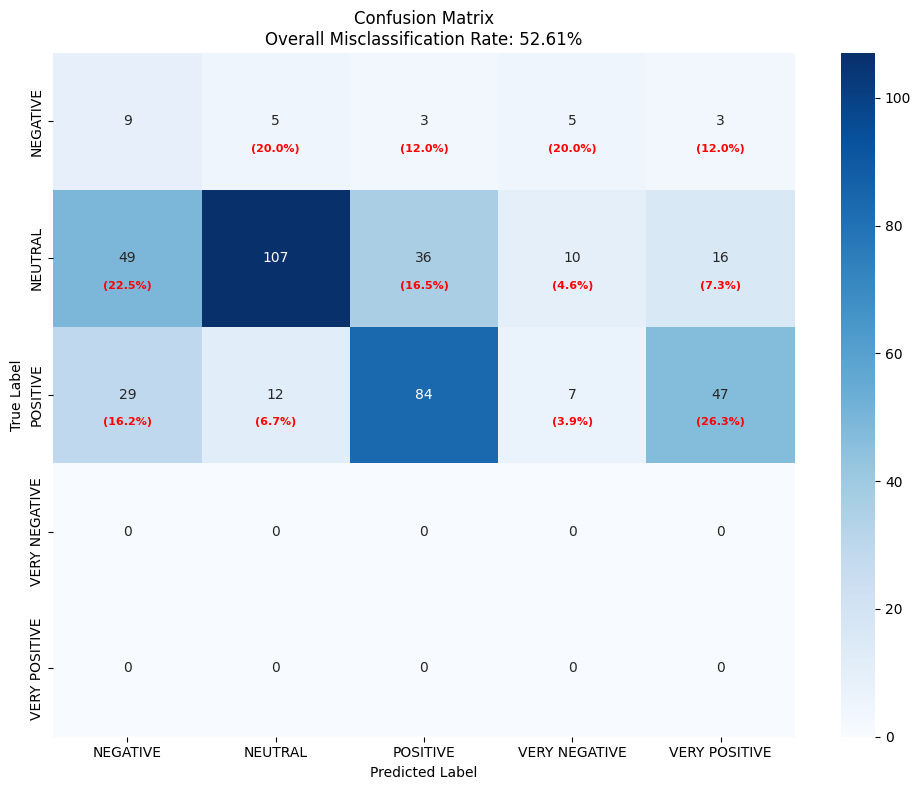


MISCLASSIFICATION ANALYSIS
Total misclassifications: 222

Top 10 High-Confidence Misclassifications:
----------------------------------------------------------------------------------------------------

1. CONFIDENCE: 0.925 | LENGTH: 65 chars
   TRUE: NEUTRAL → PREDICTED: NEGATIVE
   TEXT: it's nice to be self-confident, but being overweight is unhealthy
----------------------------------------------------------------------------------------------------

2. CONFIDENCE: 0.897 | LENGTH: 132 chars
   TRUE: POSITIVE → PREDICTED: NEGATIVE
   TEXT: my hair is curly short, but as soon as it gets length, it will not curl. i use all those products and still can't get it curl right.
----------------------------------------------------------------------------------------------------

3. CONFIDENCE: 0.891 | LENGTH: 65 chars
   TRUE: POSITIVE → PREDICTED: NEGATIVE
   TEXT: some people don't realize that a diet just not that easy like bro
------------------------------------------------------------

In [ ]:
trainer, results = run_sentiment_evaluation(
    df=df,
    comment_col='comment',
    label_col='sentiment_label',
    test_size=0  # Use full dataset
)


TESTING MODEL: tabularisai/multilingual-sentiment-analysis
SENTIMENT ANALYSIS EVALUATION
Preparing dataset...
Filtered noise: 473 → 449 samples
Final dataset size: 422
Label distribution:
sentiment_label
0    218
1    179
2     25
Name: count, dtype: int64
Unique labels: [0 1 2]

Dataset split:
  Training: 337 samples
  Testing: 85 samples
Loading model: tabularisai/multilingual-sentiment-analysis


Device set to use cuda:0


✓ Model loaded successfully!
Predicting sentiment for 85 texts...
Raw true labels found: {0, 1, 2}
Raw predicted labels found: {'Neutral', 'Negative', 'Very Negative', 'Positive', 'Very Positive'}

Label mapping applied:
Your encoding: 0=NEUTRAL, 1=POSITIVE, 2=NEGATIVE
Mapped true labels: {'NEUTRAL', 'POSITIVE', 'NEGATIVE'}
Mapped predicted labels: {'POSITIVE', 'NEGATIVE', 'VERY POSITIVE', 'VERY NEGATIVE', 'NEUTRAL'}

EVALUATION RESULTS
Model: tabularisai/multilingual-sentiment-analysis
Test samples: 85
Accuracy: 0.3882 (38.82%)
Misclassification Rate: 0.6118 (61.18%)

Classification Report:
               precision    recall  f1-score   support

     NEGATIVE       0.05      0.20      0.07         5
      NEUTRAL       0.68      0.39      0.49        44
     POSITIVE       0.79      0.42      0.55        36
VERY NEGATIVE       0.00      0.00      0.00         0
VERY POSITIVE       0.00      0.00      0.00         0

     accuracy                           0.39        85
    macro avg 

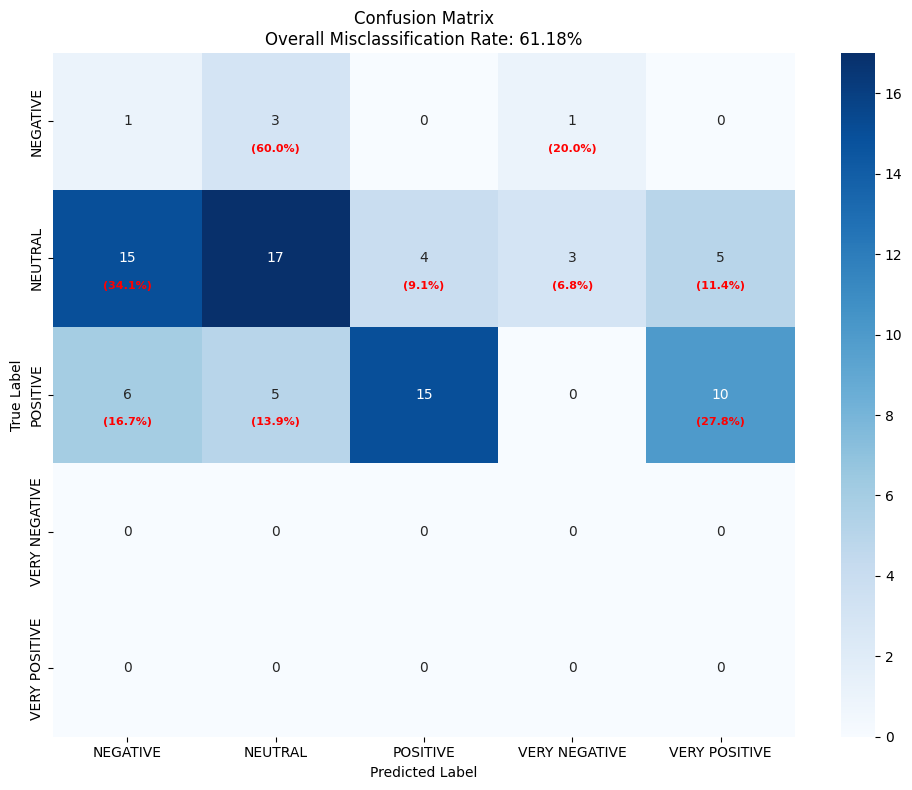


MISCLASSIFICATION ANALYSIS
Total misclassifications: 52

Top 10 High-Confidence Misclassifications:
----------------------------------------------------------------------------------------------------

1. CONFIDENCE: 0.925 | LENGTH: 65 chars
   TRUE: NEUTRAL → PREDICTED: NEGATIVE
   TEXT: it's nice to be self-confident, but being overweight is unhealthy
----------------------------------------------------------------------------------------------------

2. CONFIDENCE: 0.891 | LENGTH: 65 chars
   TRUE: POSITIVE → PREDICTED: NEGATIVE
   TEXT: some people don't realize that a diet just not that easy like bro
----------------------------------------------------------------------------------------------------

3. CONFIDENCE: 0.859 | LENGTH: 390 chars
   TRUE: POSITIVE → PREDICTED: NEGATIVE
   TEXT: i have a oily skin, with some acne and acne spots. the facewashes like geologie pc4 men and tiege henley are not available in my country. and by shipp...
----------------------------------------

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


✓ Model loaded successfully!
Predicting sentiment for 85 texts...
Raw true labels found: {0, 1, 2}
Raw predicted labels found: {'neutral', 'negative', 'positive'}

Label mapping applied:
Your encoding: 0=NEUTRAL, 1=POSITIVE, 2=NEGATIVE
Mapped true labels: {'NEUTRAL', 'POSITIVE', 'NEGATIVE'}
Mapped predicted labels: {'NEUTRAL', 'POSITIVE', 'NEGATIVE'}

EVALUATION RESULTS
Model: cardiffnlp/twitter-roberta-base-sentiment-latest
Test samples: 85
Accuracy: 0.6471 (64.71%)
Misclassification Rate: 0.3529 (35.29%)

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.19      0.60      0.29         5
     NEUTRAL       0.82      0.52      0.64        44
    POSITIVE       0.71      0.81      0.75        36

    accuracy                           0.65        85
   macro avg       0.57      0.64      0.56        85
weighted avg       0.74      0.65      0.67        85



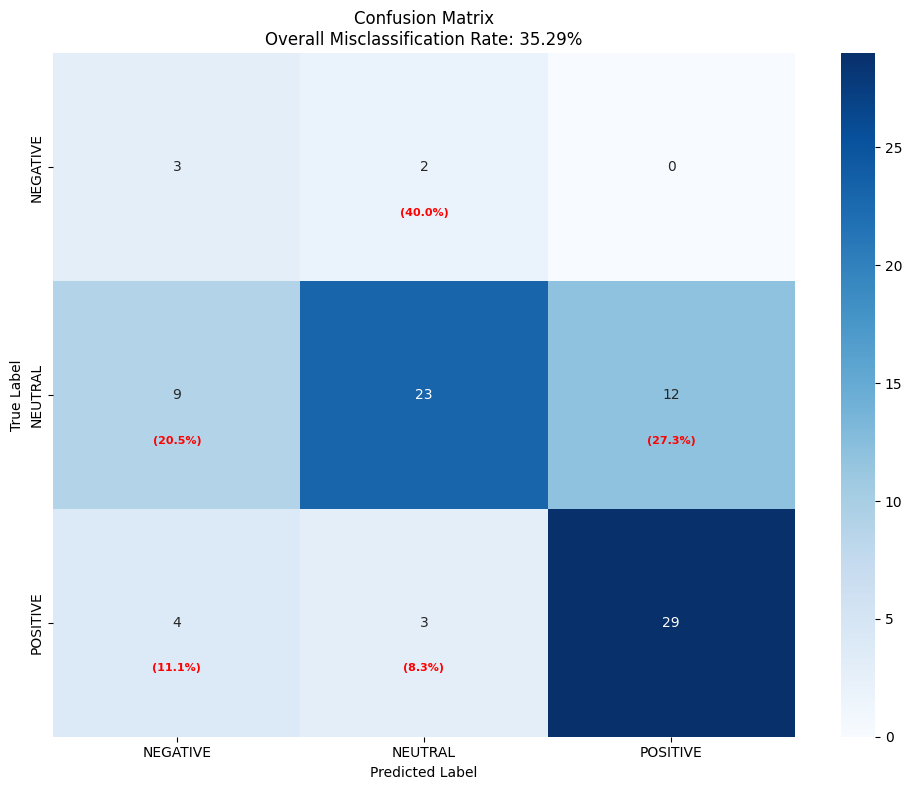


MISCLASSIFICATION ANALYSIS
Total misclassifications: 30

Top 10 High-Confidence Misclassifications:
----------------------------------------------------------------------------------------------------

1. CONFIDENCE: 0.960 | LENGTH: 8 chars
   TRUE: NEUTRAL → PREDICTED: POSITIVE
   TEXT: (amen!!)
----------------------------------------------------------------------------------------------------

2. CONFIDENCE: 0.958 | LENGTH: 21 chars
   TRUE: NEUTRAL → PREDICTED: POSITIVE
   TEXT: how You look so cutee
----------------------------------------------------------------------------------------------------

3. CONFIDENCE: 0.954 | LENGTH: 19 chars
   TRUE: NEUTRAL → PREDICTED: POSITIVE
   TEXT: oh my god is 100/10
----------------------------------------------------------------------------------------------------

4. CONFIDENCE: 0.932 | LENGTH: 23 chars
   TRUE: NEUTRAL → PREDICTED: POSITIVE
   TEXT: w blush is my favourite
-----------------------------------------------------------------

Device set to use cuda:0


✓ Model loaded successfully!
Predicting sentiment for 85 texts...
Raw true labels found: {0, 1, 2}
Raw predicted labels found: {'3 stars', '4 stars', '2 stars', '5 stars', '1 star'}

Label mapping applied:
Your encoding: 0=NEUTRAL, 1=POSITIVE, 2=NEGATIVE
Mapped true labels: {'NEUTRAL', 'POSITIVE', 'NEGATIVE'}
Mapped predicted labels: {'4 STARS', '1 STAR', '5 STARS', '3 STARS', '2 STARS'}

EVALUATION RESULTS
Model: nlptown/bert-base-multilingual-uncased-sentiment
Test samples: 85
Accuracy: 0.0000 (0.00%)
Misclassification Rate: 1.0000 (100.00%)

Classification Report:
              precision    recall  f1-score   support

      1 STAR       0.00      0.00      0.00       0.0
     2 STARS       0.00      0.00      0.00       0.0
     3 STARS       0.00      0.00      0.00       0.0
     4 STARS       0.00      0.00      0.00       0.0
     5 STARS       0.00      0.00      0.00       0.0
    NEGATIVE       0.00      0.00      0.00       5.0
     NEUTRAL       0.00      0.00      0.00    

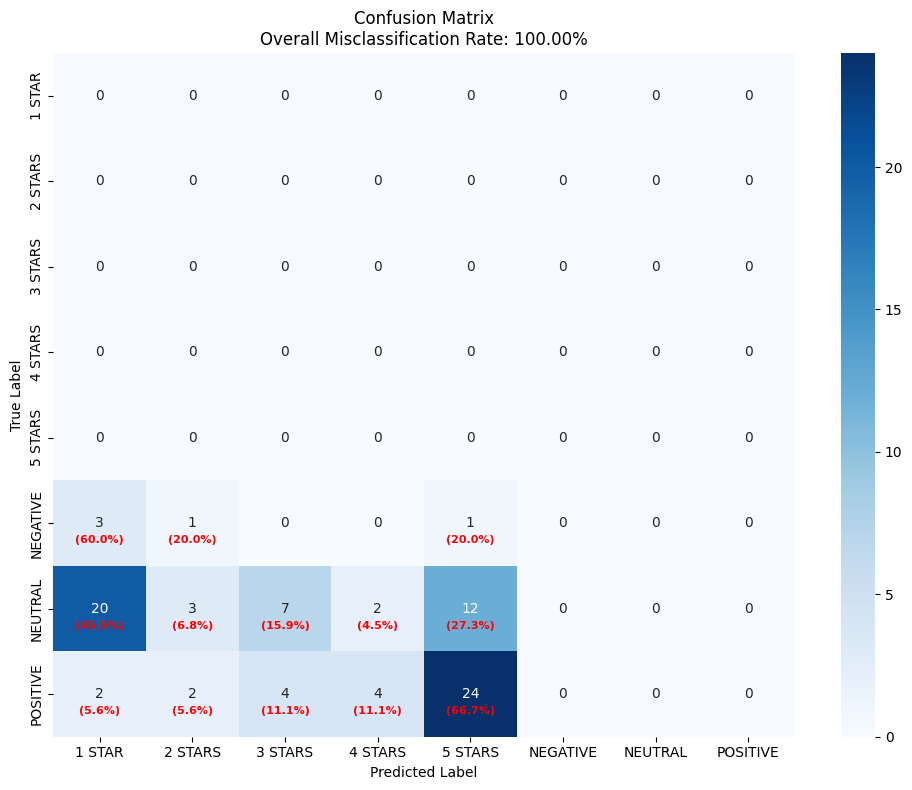


MISCLASSIFICATION ANALYSIS
Total misclassifications: 85

Top 10 High-Confidence Misclassifications:
----------------------------------------------------------------------------------------------------

1. CONFIDENCE: 0.955 | LENGTH: 19 chars
   TRUE: NEUTRAL → PREDICTED: 5 STARS
   TEXT: oh my god is 100/10
----------------------------------------------------------------------------------------------------

2. CONFIDENCE: 0.894 | LENGTH: 109 chars
   TRUE: NEGATIVE → PREDICTED: 1 STAR
   TEXT: nothing wrong with self care Laughing Out Loud, sorry your miserable and has 0 will to take care of your body
----------------------------------------------------------------------------------------------------

3. CONFIDENCE: 0.888 | LENGTH: 69 chars
   TRUE: POSITIVE → PREDICTED: 5 STARS
   TEXT: black people humour is the best humour and nobody can change my mind.
----------------------------------------------------------------------------------------------------

4. CONFIDENCE: 0.881 | LENGT

In [ ]:
# Try different models
models_to_test = [
    "tabularisai/multilingual-sentiment-analysis",
    "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "nlptown/bert-base-multilingual-uncased-sentiment"
]

for model in models_to_test:
    print(f"\n{'='*60}")
    print(f"TESTING MODEL: {model}")
    print(f"{'='*60}")

    trainer, results = run_sentiment_evaluation(
        df,
        comment_col='comment',
        label_col='sentiment_label',
        model_name=model
    )

    print_summary(results)

SENTIMENT ANALYSIS EVALUATION
Preparing dataset...
Filtered noise: 473 → 449 samples
Final dataset size: 422
Label distribution:
sentiment_label
0    218
1    179
2     25
Name: count, dtype: int64
Unique labels: [0 1 2]

Dataset split:
  Training: 337 samples
  Testing: 85 samples
Loading model: cardiffnlp/twitter-roberta-base-sentiment-latest


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


✓ Model loaded successfully!
Predicting sentiment for 85 texts...
Raw true labels found: {0, 1, 2}
Raw predicted labels found: {'neutral', 'negative', 'positive'}

Label mapping applied:
Your encoding: 0=NEUTRAL, 1=POSITIVE, 2=NEGATIVE
Mapped true labels: {'NEUTRAL', 'POSITIVE', 'NEGATIVE'}
Mapped predicted labels: {'NEUTRAL', 'POSITIVE', 'NEGATIVE'}

EVALUATION RESULTS
Model: cardiffnlp/twitter-roberta-base-sentiment-latest
Test samples: 85
Accuracy: 0.6471 (64.71%)
Misclassification Rate: 0.3529 (35.29%)

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.19      0.60      0.29         5
     NEUTRAL       0.82      0.52      0.64        44
    POSITIVE       0.71      0.81      0.75        36

    accuracy                           0.65        85
   macro avg       0.57      0.64      0.56        85
weighted avg       0.74      0.65      0.67        85



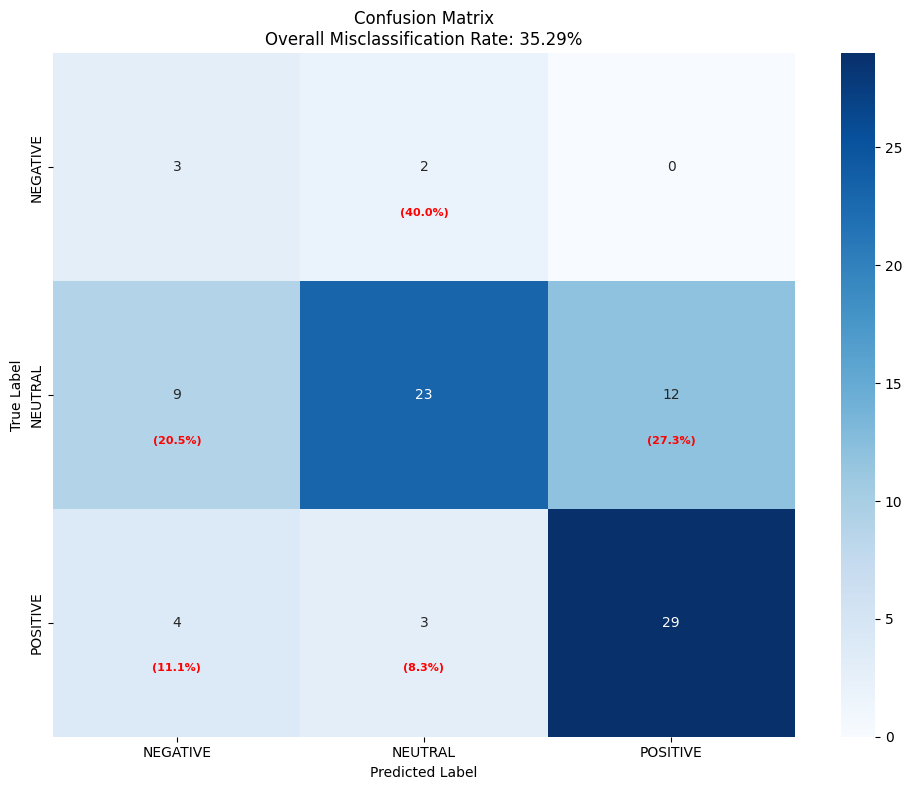


MISCLASSIFICATION ANALYSIS
Total misclassifications: 30

Top 10 High-Confidence Misclassifications:
----------------------------------------------------------------------------------------------------

1. CONFIDENCE: 0.960 | LENGTH: 8 chars
   TRUE: NEUTRAL → PREDICTED: POSITIVE
   TEXT: (amen!!)
----------------------------------------------------------------------------------------------------

2. CONFIDENCE: 0.958 | LENGTH: 21 chars
   TRUE: NEUTRAL → PREDICTED: POSITIVE
   TEXT: how You look so cutee
----------------------------------------------------------------------------------------------------

3. CONFIDENCE: 0.954 | LENGTH: 19 chars
   TRUE: NEUTRAL → PREDICTED: POSITIVE
   TEXT: oh my god is 100/10
----------------------------------------------------------------------------------------------------

4. CONFIDENCE: 0.932 | LENGTH: 23 chars
   TRUE: NEUTRAL → PREDICTED: POSITIVE
   TEXT: w blush is my favourite
-----------------------------------------------------------------

In [ ]:
# Stick with the best model and try these optimizations:

# 1. Use the Twitter RoBERTa model
trainer, results = run_sentiment_evaluation(
    df,
    comment_col='comment',  # Use translated comments for better results
    label_col='sentiment_label',
    model_name="cardiffnlp/twitter-roberta-base-sentiment-latest",
    test_size=0.2
)

# 2. Check if your labels need mapping
print("Your unique labels:", df['sentiment_label'].unique())

# 3. Consider filtering very short comments
df_filtered = df[df['comment'].str.len() > 10]